In [5]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [6]:
%load_ext blackcellmagic

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# vis based on different metrics 
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

import warnings

from REVIVAL.analysis import ndcg, ndcg_scale, custom_ndcg, calc_top_n_percent_recall, process_and_save_metrics
from REVIVAL.util import get_file_name

# Suppress only ConstantInputWarning
warnings.simplefilter("ignore", category=UserWarning)


/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [9]:
parlqb = pd.read_csv("/disk2/fli/REVIVAL2/zs/comb/ParLQ-b.csv")
parlqb

AAs                       var    fitness  selectivity  n_mut enzyme  hd  \
0   GPFAW  W56G:Y57P:L59F:Q60A:F89W   2.996901     0.180043      5  ParLQ  -5   
1   HYMAY       W56H:L59M:Q60A:F89Y  16.934836     6.359406      4  ParLQ  -4   
2   MEMDW  W56M:Y57E:L59M:Q60D:F89W  17.609432     0.932284      5  ParLQ  -5   
3   WYLQF                        WT  20.784105     0.784783      0  ParLQ   0   
4   HGMAY  W56H:Y57G:L59M:Q60A:F89Y  21.623068     9.470078      5  ParLQ  -5   
..    ...                       ...        ...          ...    ...    ...  ..   
86  FYFDY       W56F:L59F:Q60D:F89Y  82.274400    15.252473      4  ParLQ  -4   
87  HKFDY  W56H:Y57K:L59F:Q60D:F89Y  82.541131    10.950994      5  ParLQ  -5   
88  MKFKY  W56M:Y57K:L59F:Q60K:F89Y  82.691752    11.646061      5  ParLQ  -5   
89  MKFDY  W56M:Y57K:L59F:Q60D:F89Y  89.271628    10.153336      5  ParLQ  -5   
90  PKMDY  W56P:Y57K:L59M:Q60D:F89Y  91.813213    15.718841      5  ParLQ  -5   

                                                  seq AA1 AA2  ...  \
0   MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   G   P  ...   
1   MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   H   Y  ...   
2   MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   M   E  ...   
3   MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   W   Y  ...   
4   MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   H   G  ...   
..                                                ...  ..  ..  ...   
86  MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   F   Y  ...   
87  MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   H   K  ...   
88  MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   M   K  ...   
89  MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   M   K  ...   
90  MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...   P   K  ...   

   num_interactions_agg_af3-score_seperate  \
0                                       39   
1                                       38   
2                                       36   
3                                       37   
4                                       38   
..                                     ...   
86                                      41   
87                                      36   
88                                      39   
89                                      38   
90                                      37   

   vina_af3-score_seperate-substrate_cofactor-score_only  \
0                                                 NaN      
1                                                 NaN      
2                                                 NaN      
3                                                 NaN      
4                                                 NaN      
..                                                ...      
86                                                NaN      
87                                                NaN      
88                                                NaN      
89                                                NaN      
90                                                NaN      

   vina_min_af3-score_seperate-substrate_cofactor-score_only  \
0                                                 NaN          
1                                                 NaN          
2                                                 NaN          
3                                                 NaN          
4                                                 NaN          
..                                                ...          
86                                                NaN          
87                                                NaN          
88                                                NaN          
89                                                NaN          
90                                                NaN          

   vina_max_af3-score_seperate-substrate_cofactor-score_only  \
0                                                 NaN          
1                    

In [5]:
process_and_save_metrics(
    input_dir="/disk2/fli/REVIVAL2/zs/comb", 
    output_dir="/disk2/fli/REVIVAL2/zs/metrics")

Processing: ParLQ-b
Processing: ParLQ-c
Processing: ParLQ-d
Processing: ParLQ-e
Processing: ParLQ-f
Processing: ParLQ-g
Processing: ParLQ-h
Processing: ParLQ-i
Processing: ParLQ
Processing: PfTrpB-4bromo
Processing: PfTrpB-4cyano
Processing: PfTrpB-56chloro
Processing: PfTrpB-5bromo
Processing: PfTrpB-5chloro
Processing: PfTrpB-5cyano
Processing: PfTrpB-5iodo
Processing: PfTrpB-6chloro
Processing: PfTrpB-7bromo
Processing: PfTrpB-7iodo
Processing: PfTrpB-7methyl
Processing: Rma-CB
Processing: Rma-CSi
All metrics saved successfully!


In [ ]:
# fit_rho_list = []
# fit_ndcg_list = []
fit_ndcg10_list = []
fit_ndcg20_list = []
fit_ndcg25_list = []
# fit_top10_list = []
fit_top20_list = []
# fit_top25_list = []
# fit_top50_list = []

# sele_rho_list = []
# sele_ndcg_list = []
sele_ndcg10_list = []
sele_ndcg20_list = []
sele_ndcg25_list = []
# sele_top10_list = []
sele_top20_list = []
# sele_top25_list = []
# sele_top50_list = []

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/comb/*.csv")):
    if "_scope" in f:
        continue
    df_original = pd.read_csv(f)
    # see if the fitness is a string
    if df_original["fitness"].dtype == "O":
        # convert fitness to numerical
        df_original["fitness"] = pd.to_numeric(df_original["fitness"].str.replace(",", ""), errors='coerce')
    df_original = df_original[df_original.select_dtypes(include=["number"]).columns]
    df_name = get_file_name(f)
    print(df_name)

    # rho_dict = {"lib": df_name}
    # ndcg_dict = {"lib": df_name}
    ndcg10_dict = {"lib": df_name}
    ndcg20_dict = {"lib": df_name}
    ndcg25_dict = {"lib": df_name}
    # top10_dict = {"lib": df_name}
    top20_dict = {"lib": df_name}
    # top25_dict = {"lib": df_name}
    # top50_dict = {"lib": df_name}

    if "selectivity" in df_original.columns:
        add_selectivity = True
        # sele_rho_dict = {"lib": df_name}
        # sele_ndcg_dict = {"lib": df_name}
        sele_ndcg10_dict = {"lib": df_name}
        sele_ndcg20_dict = {"lib": df_name}
        sele_ndcg25_dict = {"lib": df_name}
        # sele_top10_dict = {"lib": df_name}
        sele_top20_dict = {"lib": df_name}
        # sele_top25_dict = {"lib": df_name}
        # sele_top50_dict = {"lib": df_name}
    else:
        add_selectivity = False

    for c in df_original.columns:
        if c == "fitness" or "_rank" in c:
            continue
        # check if nan is in the column, if so print out the rows with nan
        # if df_original[c].isna().sum() > 0:
            # print(c)
            # print(len(df_original[df_original[c].isna()]))
        # now slice out the rows without nan
        df = df_original[df_original[c].notna()]
        if len(df) == 0:
            # rho_dict[c] = np.nan
            # ndcg_dict[c] = np.nan
            ndcg10_dict[c] = np.nan
            ndcg20_dict[c] = np.nan
            ndcg25_dict[c] = np.nan
            # top10_dict[c] = np.nan
            top20_dict[c] = np.nan
            # top25_dict[c] = np.nan
            # top50_dict[c] = np.nan

            if add_selectivity:
                # sele_rho_dict[c] = np.nan
                # sele_ndcg_dict[c] = np.nan
                sele_ndcg10_dict[c] = np.nan
                sele_ndcg20_dict[c] = np.nan
                sele_ndcg25_dict[c] = np.nan
                # sele_top10_dict[c] = np.nan
                sele_top20_dict[c] = np.nan
                # sele_top25_dict[c] = np.nan
                # sele_top50_dict[c] = np.nan

        else:

            y_true = df["fitness"].values
            y_score = df[c].values

            if (
                "Triad_score" in c
                or "chain_pae_min" in c
                or "sum_" in c
                or "naive_score" in c
                or c == "complexscore"
                or c == "dH"
                or c == "ligscore"
                or c == "recscore"
                or c == "score"
                or c == "total_score"
                or "vina_" in c
                or "0:" in c
                or "1:" in c
                or "2:" in c
                or "_vol" in c
            ):
                y_score = -1 * y_score
                # print(f"flipping {c}")
            if " - " in c:
                y_score = np.abs(y_score)
            # if np.all(y_score == y_score[0]):  # Check if all values are identical
            #     rho_dict[c] = np.nan  # Assign NaN or 0 if needed
            # else:
            #     rho_dict[c] = spearmanr(y_true, y_score).correlation
            
            # ndcg_dict[c] = ndcg_scale(y_true=y_true, y_pred=y_score)
            ndcg10_dict[c] = custom_ndcg(y_true=y_true, y_score=y_score, k=10)
            ndcg20_dict[c] = custom_ndcg(y_true=y_true, y_score=y_score, k=20)
            ndcg25_dict[c] = custom_ndcg(y_true=y_true, y_score=y_score, k=25)
            
            
            # top10_dict[c] = calc_top_n_percent_recall(
            #     y_true=y_true, y_score=y_score, top_n=10
            # )
            top20_dict[c] = calc_top_n_percent_recall(
                y_true=y_true, y_score=y_score, top_n=20
            )
            # top25_dict[c] = calc_top_n_percent_recall(
            #     y_true=y_true, y_score=y_score, top_n=25
            # )
            
            # top50_dict[c] = calc_top_n_percent_recall(
            #     y_true=y_true, y_score=y_score, top_n=50
            # )

            if add_selectivity and c != "selectivity":
                y_true_sele = df["selectivity"].values
                y_score_sele = y_score

                # if np.all(
                #     y_score_sele == y_score_sele[0]
                # ):  # Check if all values are identical
                #     sele_rho_dict[c] = np.nan
                # else:
                #     sele_rho_dict[c] = spearmanr(y_true_sele, y_score_sele).correlation
                # sele_ndcg_dict[c] = ndcg_scale(y_true=y_true_sele, y_pred=y_score_sele)
                sele_ndcg10_dict[c] = custom_ndcg(
                    y_true=y_true_sele, y_score=y_score_sele, k=10
                )
                sele_ndcg20_dict[c] = custom_ndcg(
                    y_true=y_true_sele, y_score=y_score_sele, k=20
                )
                sele_ndcg25_dict[c] = custom_ndcg(
                    y_true=y_true_sele, y_score=y_score_sele, k=25
                )
                # sele_top10_dict[c] = calc_top_n_percent_recall(
                #     y_true=y_true_sele, y_score=y_score_sele, top_n=10
                # )
                sele_top20_dict[c] = calc_top_n_percent_recall(
                    y_true=y_true_sele, y_score=y_score_sele, top_n=20
                )
                # sele_top25_dict[c] = calc_top_n_percent_recall(
                #     y_true=y_true_sele, y_score=y_score_sele, top_n=25
                # )
                # sele_top50_dict[c] = calc_top_n_percent_recall(
                #     y_true=y_true_sele, y_score=y_score_sele, top_n=50
                # )

    # fit_rho_list.append(rho_dict)
    # fit_ndcg_list.append(ndcg_dict)
    fit_ndcg10_list.append(ndcg10_dict)
    fit_ndcg20_list.append(ndcg20_dict)
    fit_ndcg25_list.append(ndcg25_dict)
    # fit_top10_list.append(top10_dict)
    fit_top20_list.append(top20_dict)
    # fit_top25_list.append(top25_dict)
    # fit_top50_list.append(top50_dict)

    if add_selectivity:
        # sele_rho_list.append(sele_rho_dict)
        # sele_ndcg_list.append(sele_ndcg_dict)
        sele_ndcg10_list.append(sele_ndcg10_dict)
        sele_ndcg20_list.append(sele_ndcg20_dict)
        sele_ndcg25_list.append(sele_ndcg25_dict)
        # sele_top10_list.append(sele_top10_dict)
        # sele_top25_list.append(sele_top25_dict)
        # sele_top50_list.append(sele_top50_dict)

# df_rho_fit = pd.DataFrame(fit_rho_list)
# df_ndcg_fit = pd.DataFrame(fit_ndcg_list)
df_ndcg10_fit = pd.DataFrame(fit_ndcg10_list)
df_ndcg20_fit = pd.DataFrame(fit_ndcg20_list)
df_ndcg25_fit = pd.DataFrame(fit_ndcg25_list)
# df_top10_fit = pd.DataFrame(fit_top10_list)
df_top20_fit = pd.DataFrame(fit_top20_list)
# df_top25_fit = pd.DataFrame(fit_top25_list)
# df_top50_fit = pd.DataFrame(fit_top50_list)
# df_rho_sele = pd.DataFrame(sele_rho_list)
# df_ndcg_sele = pd.DataFrame(sele_ndcg_list)
df_ndcg10_sele = pd.DataFrame(sele_ndcg10_list)
df_ndcg20_sele = pd.DataFrame(sele_ndcg20_list)
df_ndcg25_sele = pd.DataFrame(sele_ndcg25_list)
# df_top10_sele = pd.DataFrame(sele_top10_list)
df_top20_sele = pd.DataFrame(sele_top20_list)
# df_top25_sele = pd.DataFrame(sele_top25_list)
# df_top50_sele = pd.DataFrame(sele_top50_list)

# save them all 
# df_rho_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_rho.csv", index=False)
# df_ndcg_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg.csv", index=False)
df_ndcg10_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg10.csv", index=False)
df_ndcg20_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg20.csv", index=False)
df_ndcg25_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg25.csv", index=False)
# df_top10_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top10.csv", index=False)
df_top20_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top20.csv", index=False)
# df_top25_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top25.csv", index=False)
# df_top50_fit.to_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top50.csv", index=False)
# df_rho_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_rho.csv", index=False)
# df_ndcg_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg.csv", index=False)
df_ndcg10_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg10.csv", index=False)
df_ndcg20_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg20.csv", index=False)
df_ndcg25_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg25.csv", index=False)
# df_top10_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top10.csv", index=False)
df_top20_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top20.csv", index=False)
# df_top25_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top25.csv", index=False)
# df_top50_sele.to_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top50.csv", index=False)

ParLQ-b
ParLQ-c
ParLQ-d
ParLQ-e
ParLQ-f
ParLQ-g
ParLQ-h
ParLQ-i
ParLQ
PfTrpB-4bromo
PfTrpB-4cyano
PfTrpB-56chloro
PfTrpB-5bromo
PfTrpB-5chloro
PfTrpB-5cyano
PfTrpB-5iodo
PfTrpB-6chloro
PfTrpB-7bromo
PfTrpB-7iodo
PfTrpB-7methyl
Rma-CB
Rma-CSi


In [10]:
df_rho_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_rho.csv")
# df_ndcg_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg.csv")
df_ndcg10_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg10.csv")
df_ndcg20_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg20.csv")
df_ndcg25_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_ndcg25.csv")
df_top10_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top10.csv")
df_top20_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top20.csv")
df_top25_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top25.csv")
# df_top50_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top50.csv")
df_rho_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_rho.csv")
df_ndcg10_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg10.csv")
df_ndcg20_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg20.csv")
df_ndcg25_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg25.csv")
# df_ndcg_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_ndcg.csv")
df_top10_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top10.csv")
df_top20_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top20.csv")
df_top25_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top25.csv")
# df_top50_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top50.csv")

In [8]:
df_rho_fit["2:GLU-NH_2_avg_af3-struct_joint"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.382734
10    0.301838
11    0.084174
12    0.135002
13    0.058986
14    0.114252
15    0.111872
16    0.234978
17    0.210749
18    0.181878
19    0.221975
20         NaN
21         NaN
Name: 2:GLU-NH_2_avg_af3-struct_joint, dtype: float64

In [51]:
# rename ParLQ in the column lib to ParLQ-a
df_rho_fit['lib'] = df_rho_fit['lib'].apply(lambda x: 'ParLQ-a' if x == 'ParLQ' else x)
df_top25_fit['lib'] = df_top25_fit['lib'].apply(lambda x: 'ParLQ-a' if x == 'ParLQ' else x)
df_rho_sele['lib'] = df_rho_sele['lib'].apply(lambda x: 'ParLQ-a' if x == 'ParLQ' else x)
df_top25_sele['lib'] = df_top25_sele['lib'].apply(lambda x: 'ParLQ-a' if x == 'ParLQ' else x)


In [11]:
custom_order = [
    "PfTrpB-7iodo",
    "PfTrpB-7methyl",
    "PfTrpB-7bromo",
    "PfTrpB-5iodo",
    "PfTrpB-5bromo",
    "PfTrpB-5chloro",
    "PfTrpB-4bromo",
    "PfTrpB-6chloro",
    "PfTrpB-5cyano",
    "PfTrpB-4cyano",
    "PfTrpB-56chloro",
    "Rma-CB",
    "Rma-CSi",
    "ParLQ-a",
    "ParLQ-b",
    "ParLQ-c",
    "ParLQ-d",
    "ParLQ-e",
    "ParLQ-f",
    "ParLQ-g",
    "ParLQ-h",
    "ParLQ-i",
]
# substrate
# 7iodo       0.605263
# 7methyl     0.605263
# 7bromo      0.605263
# 5iodo       0.600000
# 5bromo      0.600000
# 5chloro     0.600000
# 4bromo      0.550000
# 6chloro     0.536585
# 5cyano      0.489796
# 4cyano      0.489362
# 56chloro    0.333333
# Name: Atom Pair, dtype: float64

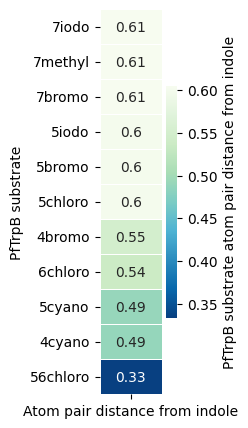

In [11]:

# Sample data
data = {
    "PfTrpB substrate": [
        "7iodo", "7methyl", "7bromo", "5iodo", "5bromo",
        "5chloro", "4bromo", "6chloro", "5cyano", "4cyano", "56chloro"
    ],
    "Atom pair distance from indole": [
        0.605263, 0.605263, 0.605263, 0.600000, 0.600000,
        0.600000, 0.550000, 0.536585, 0.489796, 0.489362, 0.333333
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data).set_index("PfTrpB substrate")

# Set figure size
plt.figure(figsize=(1, 5))

# Create heatmap with grayscale colormap
sns.heatmap(df, cmap="GnBu_r", annot=True, linewidths=0.5, cbar_kws={"label": "PfTrpB substrate atom pair distance from indole"}  )

# Show plot
plt.show()


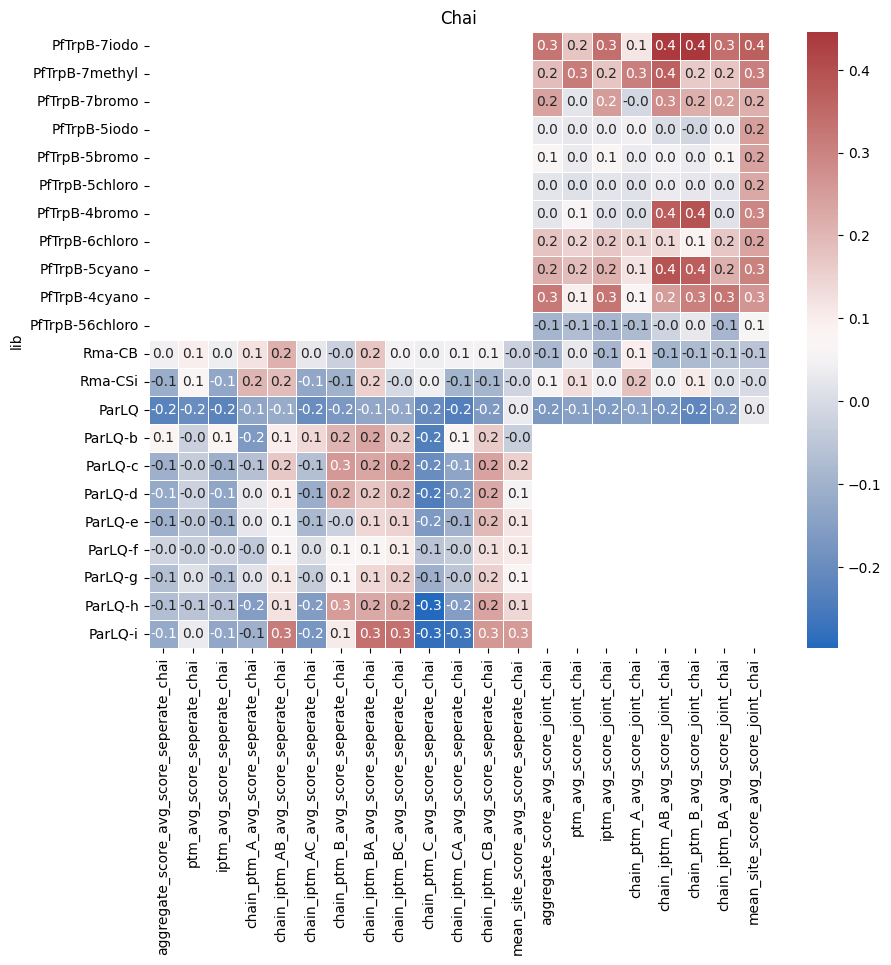

In [12]:
chai_df = (
    df_rho_fit[
        [
            "lib",
            "aggregate_score_avg_score_seperate_chai",
            "ptm_avg_score_seperate_chai",
            "iptm_avg_score_seperate_chai",
            "chain_ptm_A_avg_score_seperate_chai",
            "chain_iptm_AB_avg_score_seperate_chai",
            "chain_iptm_AC_avg_score_seperate_chai",
            "chain_ptm_B_avg_score_seperate_chai",
            "chain_iptm_BA_avg_score_seperate_chai",
            "chain_iptm_BC_avg_score_seperate_chai",
            "chain_ptm_C_avg_score_seperate_chai",
            "chain_iptm_CA_avg_score_seperate_chai",
            "chain_iptm_CB_avg_score_seperate_chai",
            "mean_site_score_avg_score_seperate_chai",
            "aggregate_score_avg_score_joint_chai",
            "ptm_avg_score_joint_chai",
            "iptm_avg_score_joint_chai",
            "chain_ptm_A_avg_score_joint_chai",
            "chain_iptm_AB_avg_score_joint_chai",
            "chain_ptm_B_avg_score_joint_chai",
            "chain_iptm_BA_avg_score_joint_chai",
            "mean_site_score_avg_score_joint_chai",
        ]
    ]
    .set_index("lib")
    .reindex(custom_order)
)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(chai_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)

# Show the plot
plt.title("Chai")
plt.show()

In [13]:
chai_df.mean().sort_values(ascending=False)

mean_site_score_avg_score_joint_chai       0.195523
chain_iptm_BA_avg_score_seperate_chai      0.159919
chain_iptm_AB_avg_score_joint_chai         0.147932
chain_iptm_BC_avg_score_seperate_chai      0.136940
chain_ptm_B_avg_score_joint_chai           0.133046
chain_iptm_CB_avg_score_seperate_chai      0.128219
chain_iptm_AB_avg_score_seperate_chai      0.119331
aggregate_score_avg_score_joint_chai       0.095056
iptm_avg_score_joint_chai                  0.094393
chain_iptm_BA_avg_score_joint_chai         0.093071
chain_ptm_B_avg_score_seperate_chai        0.078899
mean_site_score_avg_score_seperate_chai    0.078448
ptm_avg_score_joint_chai                   0.072293
chain_ptm_A_avg_score_joint_chai           0.065338
ptm_avg_score_seperate_chai               -0.018489
chain_ptm_A_avg_score_seperate_chai       -0.024261
chain_iptm_AC_avg_score_seperate_chai     -0.070912
aggregate_score_avg_score_seperate_chai   -0.074640
iptm_avg_score_seperate_chai              -0.077802
chain_iptm_C

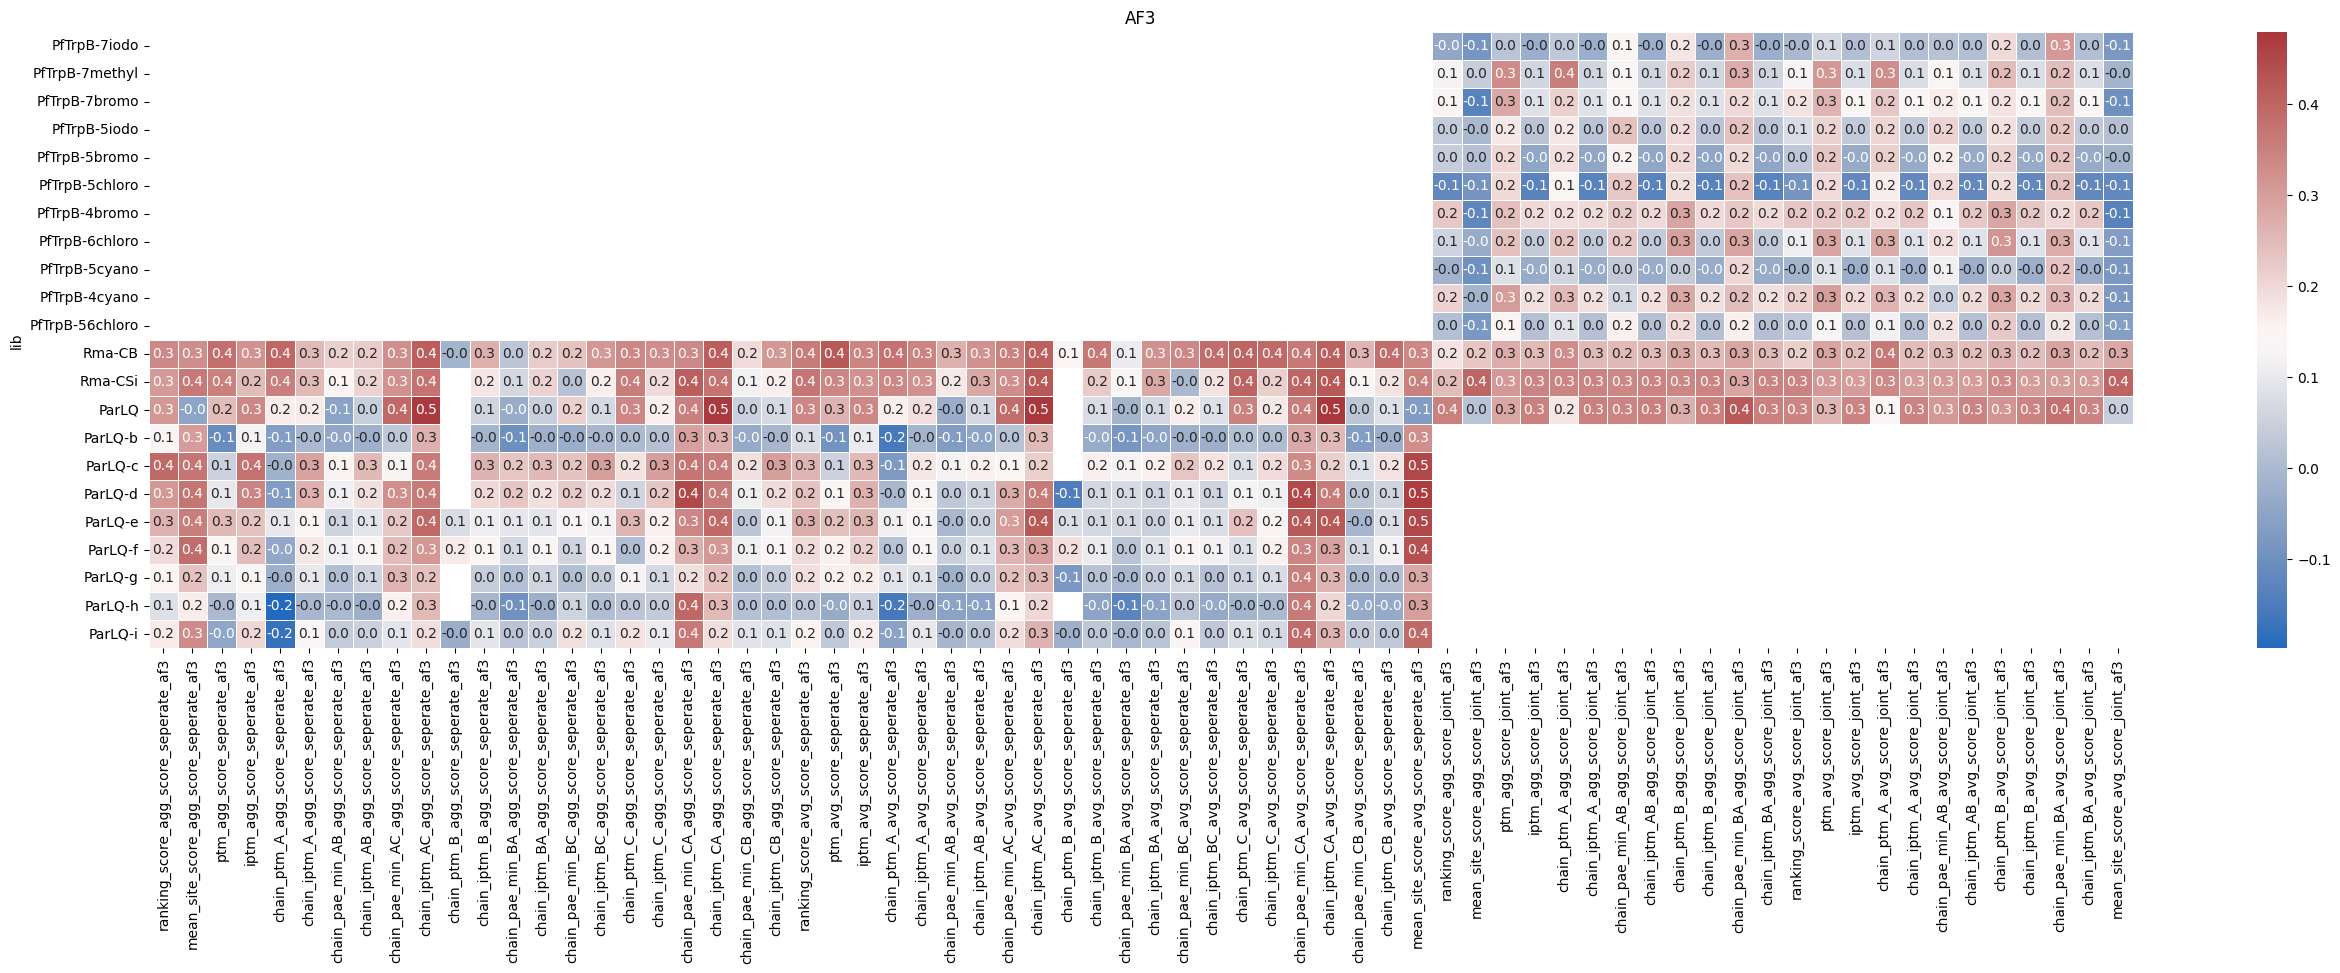

In [14]:
af3_df = (
    df_rho_fit[
        [
            "lib",
            "ranking_score_agg_score_seperate_af3",
            "mean_site_score_agg_score_seperate_af3",
            "ptm_agg_score_seperate_af3",
            "iptm_agg_score_seperate_af3",
            # "fraction_disordered_agg_score_seperate_af3",
            "chain_ptm_A_agg_score_seperate_af3",
            "chain_iptm_A_agg_score_seperate_af3",
            "chain_pae_min_AB_agg_score_seperate_af3",
            "chain_iptm_AB_agg_score_seperate_af3",
            "chain_pae_min_AC_agg_score_seperate_af3",
            "chain_iptm_AC_agg_score_seperate_af3",
            "chain_ptm_B_agg_score_seperate_af3",
            "chain_iptm_B_agg_score_seperate_af3",
            "chain_pae_min_BA_agg_score_seperate_af3",
            "chain_iptm_BA_agg_score_seperate_af3",
            "chain_pae_min_BC_agg_score_seperate_af3",
            "chain_iptm_BC_agg_score_seperate_af3",
            "chain_ptm_C_agg_score_seperate_af3",
            "chain_iptm_C_agg_score_seperate_af3",
            "chain_pae_min_CA_agg_score_seperate_af3",
            "chain_iptm_CA_agg_score_seperate_af3",
            "chain_pae_min_CB_agg_score_seperate_af3",
            "chain_iptm_CB_agg_score_seperate_af3",
            "ranking_score_avg_score_seperate_af3",
            "ptm_avg_score_seperate_af3",
            "iptm_avg_score_seperate_af3",
            # "fraction_disordered_avg_score_seperate_af3",
            "chain_ptm_A_avg_score_seperate_af3",
            "chain_iptm_A_avg_score_seperate_af3",
            "chain_pae_min_AB_avg_score_seperate_af3",
            "chain_iptm_AB_avg_score_seperate_af3",
            "chain_pae_min_AC_avg_score_seperate_af3",
            "chain_iptm_AC_avg_score_seperate_af3",
            "chain_ptm_B_avg_score_seperate_af3",
            "chain_iptm_B_avg_score_seperate_af3",
            "chain_pae_min_BA_avg_score_seperate_af3",
            "chain_iptm_BA_avg_score_seperate_af3",
            "chain_pae_min_BC_avg_score_seperate_af3",
            "chain_iptm_BC_avg_score_seperate_af3",
            "chain_ptm_C_avg_score_seperate_af3",
            "chain_iptm_C_avg_score_seperate_af3",
            "chain_pae_min_CA_avg_score_seperate_af3",
            "chain_iptm_CA_avg_score_seperate_af3",
            "chain_pae_min_CB_avg_score_seperate_af3",
            "chain_iptm_CB_avg_score_seperate_af3",
            "mean_site_score_avg_score_seperate_af3",
            "ranking_score_agg_score_joint_af3",
            "mean_site_score_agg_score_joint_af3",
            "ptm_agg_score_joint_af3",
            "iptm_agg_score_joint_af3",
            # "fraction_disordered_agg_score_joint_af3",
            "chain_ptm_A_agg_score_joint_af3",
            "chain_iptm_A_agg_score_joint_af3",
            "chain_pae_min_AB_agg_score_joint_af3",
            "chain_iptm_AB_agg_score_joint_af3",
            "chain_ptm_B_agg_score_joint_af3",
            "chain_iptm_B_agg_score_joint_af3",
            "chain_pae_min_BA_agg_score_joint_af3",
            "chain_iptm_BA_agg_score_joint_af3",
            "ranking_score_avg_score_joint_af3",
            "ptm_avg_score_joint_af3",
            "iptm_avg_score_joint_af3",
            # "fraction_disordered_avg_score_joint_af3",
            "chain_ptm_A_avg_score_joint_af3",
            "chain_iptm_A_avg_score_joint_af3",
            "chain_pae_min_AB_avg_score_joint_af3",
            "chain_iptm_AB_avg_score_joint_af3",
            "chain_ptm_B_avg_score_joint_af3",
            "chain_iptm_B_avg_score_joint_af3",
            "chain_pae_min_BA_avg_score_joint_af3",
            "chain_iptm_BA_avg_score_joint_af3",
            "mean_site_score_avg_score_joint_af3",
        ]
    ]
    .set_index("lib")
    .reindex(custom_order)
)

# Set the figure size
plt.figure(figsize=(32, 8))

# Create a heatmap
sns.heatmap(af3_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)

# Show the plot
plt.title("AF3")
plt.show()

In [15]:
af3_df.mean().sort_values(ascending=False)[:20]

chain_pae_min_CA_avg_score_seperate_af3    0.366314
chain_pae_min_CA_agg_score_seperate_af3    0.342143
mean_site_score_avg_score_seperate_af3     0.338127
chain_iptm_AC_agg_score_seperate_af3       0.330191
chain_iptm_CA_agg_score_seperate_af3       0.330191
chain_iptm_AC_avg_score_seperate_af3       0.324976
chain_iptm_CA_avg_score_seperate_af3       0.324976
mean_site_score_agg_score_seperate_af3     0.287421
chain_pae_min_BA_avg_score_joint_af3       0.259055
chain_pae_min_BA_agg_score_joint_af3       0.252126
iptm_agg_score_seperate_af3                0.242552
ranking_score_agg_score_seperate_af3       0.241147
chain_pae_min_AC_avg_score_seperate_af3    0.238943
chain_ptm_B_avg_score_joint_af3            0.233858
chain_pae_min_AC_agg_score_seperate_af3    0.227967
chain_ptm_B_agg_score_joint_af3            0.225707
iptm_avg_score_seperate_af3                0.225098
ptm_avg_score_joint_af3                    0.224783
ranking_score_avg_score_seperate_af3       0.224706
ptm_agg_scor

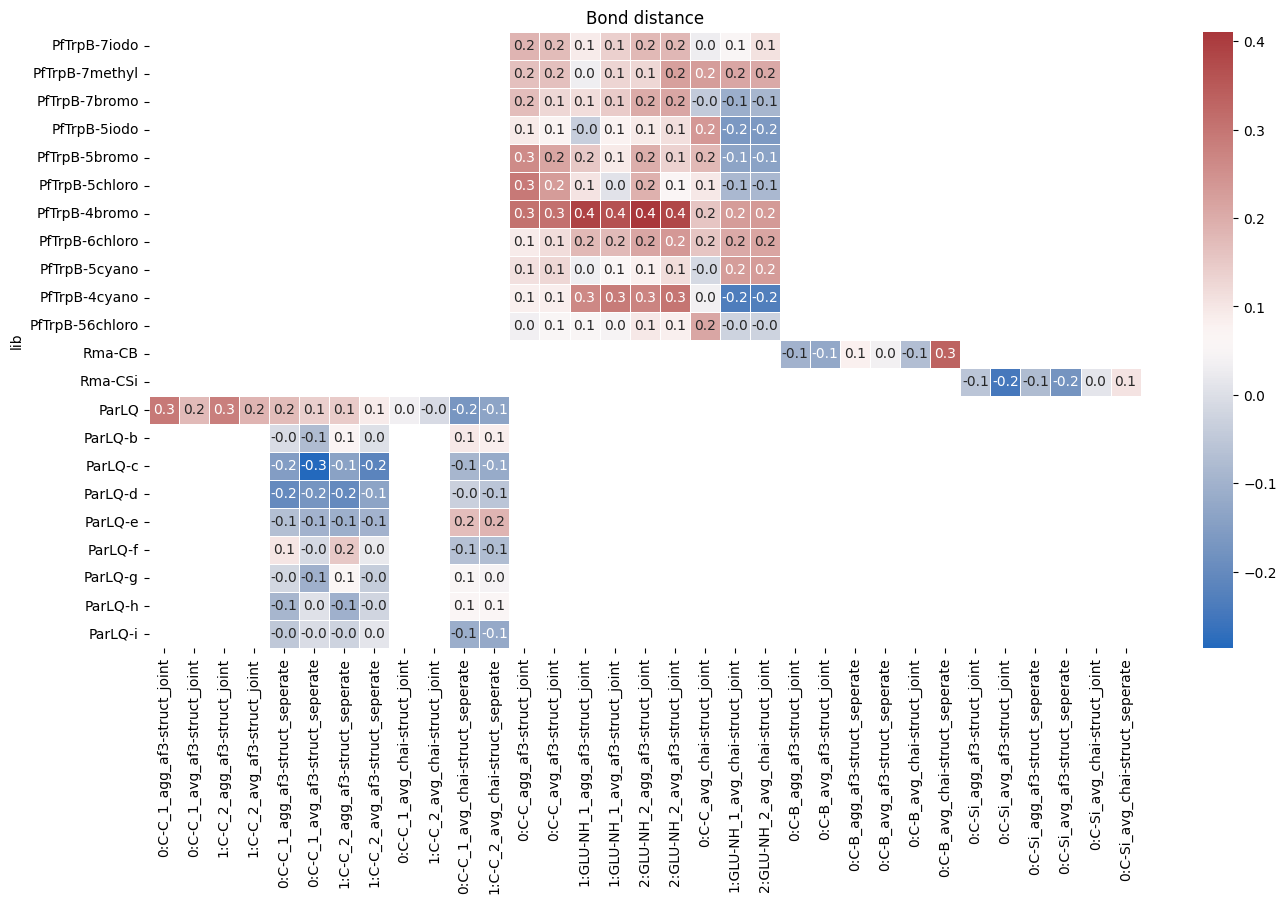

In [16]:
bond_df = (
    df_rho_fit[
        [
            "lib",
            "0:C-C_1_agg_af3-struct_joint",
            "0:C-C_1_avg_af3-struct_joint",
            "1:C-C_2_agg_af3-struct_joint",
            "1:C-C_2_avg_af3-struct_joint",
            "0:C-C_1_agg_af3-struct_seperate",
            "0:C-C_1_avg_af3-struct_seperate",
            "1:C-C_2_agg_af3-struct_seperate",
            "1:C-C_2_avg_af3-struct_seperate",
            "0:C-C_1_avg_chai-struct_joint",
            "1:C-C_2_avg_chai-struct_joint",
            "0:C-C_1_avg_chai-struct_seperate",
            "1:C-C_2_avg_chai-struct_seperate",
            "0:C-C_agg_af3-struct_joint",
            "0:C-C_avg_af3-struct_joint",
            "1:GLU-NH_1_agg_af3-struct_joint",
            "1:GLU-NH_1_avg_af3-struct_joint",
            "2:GLU-NH_2_agg_af3-struct_joint",
            "2:GLU-NH_2_avg_af3-struct_joint",
            "0:C-C_avg_chai-struct_joint",
            "1:GLU-NH_1_avg_chai-struct_joint",
            "2:GLU-NH_2_avg_chai-struct_joint",
            "0:C-B_agg_af3-struct_joint",
            "0:C-B_avg_af3-struct_joint",
            "0:C-B_agg_af3-struct_seperate",
            "0:C-B_avg_af3-struct_seperate",
            "0:C-B_avg_chai-struct_joint",
            "0:C-B_avg_chai-struct_seperate",
            "0:C-Si_agg_af3-struct_joint",
            "0:C-Si_avg_af3-struct_joint",
            "0:C-Si_agg_af3-struct_seperate",
            "0:C-Si_avg_af3-struct_seperate",
            "0:C-Si_avg_chai-struct_joint",
            "0:C-Si_avg_chai-struct_seperate",
        ]
    ]
    .set_index("lib")
    .reindex(custom_order)
)

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a heatmap
sns.heatmap(bond_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)

# Show the plot
plt.title("Bond distance")
plt.show()

In [17]:
bond_df.mean().sort_values(ascending=False)[:10]

0:C-B_avg_chai-struct_seperate     0.333174
0:C-C_1_agg_af3-struct_joint       0.292502
1:C-C_2_agg_af3-struct_joint       0.282574
2:GLU-NH_2_agg_af3-struct_joint    0.187464
2:GLU-NH_2_avg_af3-struct_joint    0.185313
1:C-C_2_avg_af3-struct_joint       0.185062
0:C-C_1_avg_af3-struct_joint       0.176340
0:C-C_agg_af3-struct_joint         0.162838
0:C-C_avg_af3-struct_joint         0.152101
1:GLU-NH_1_avg_af3-struct_joint    0.138475
dtype: float64

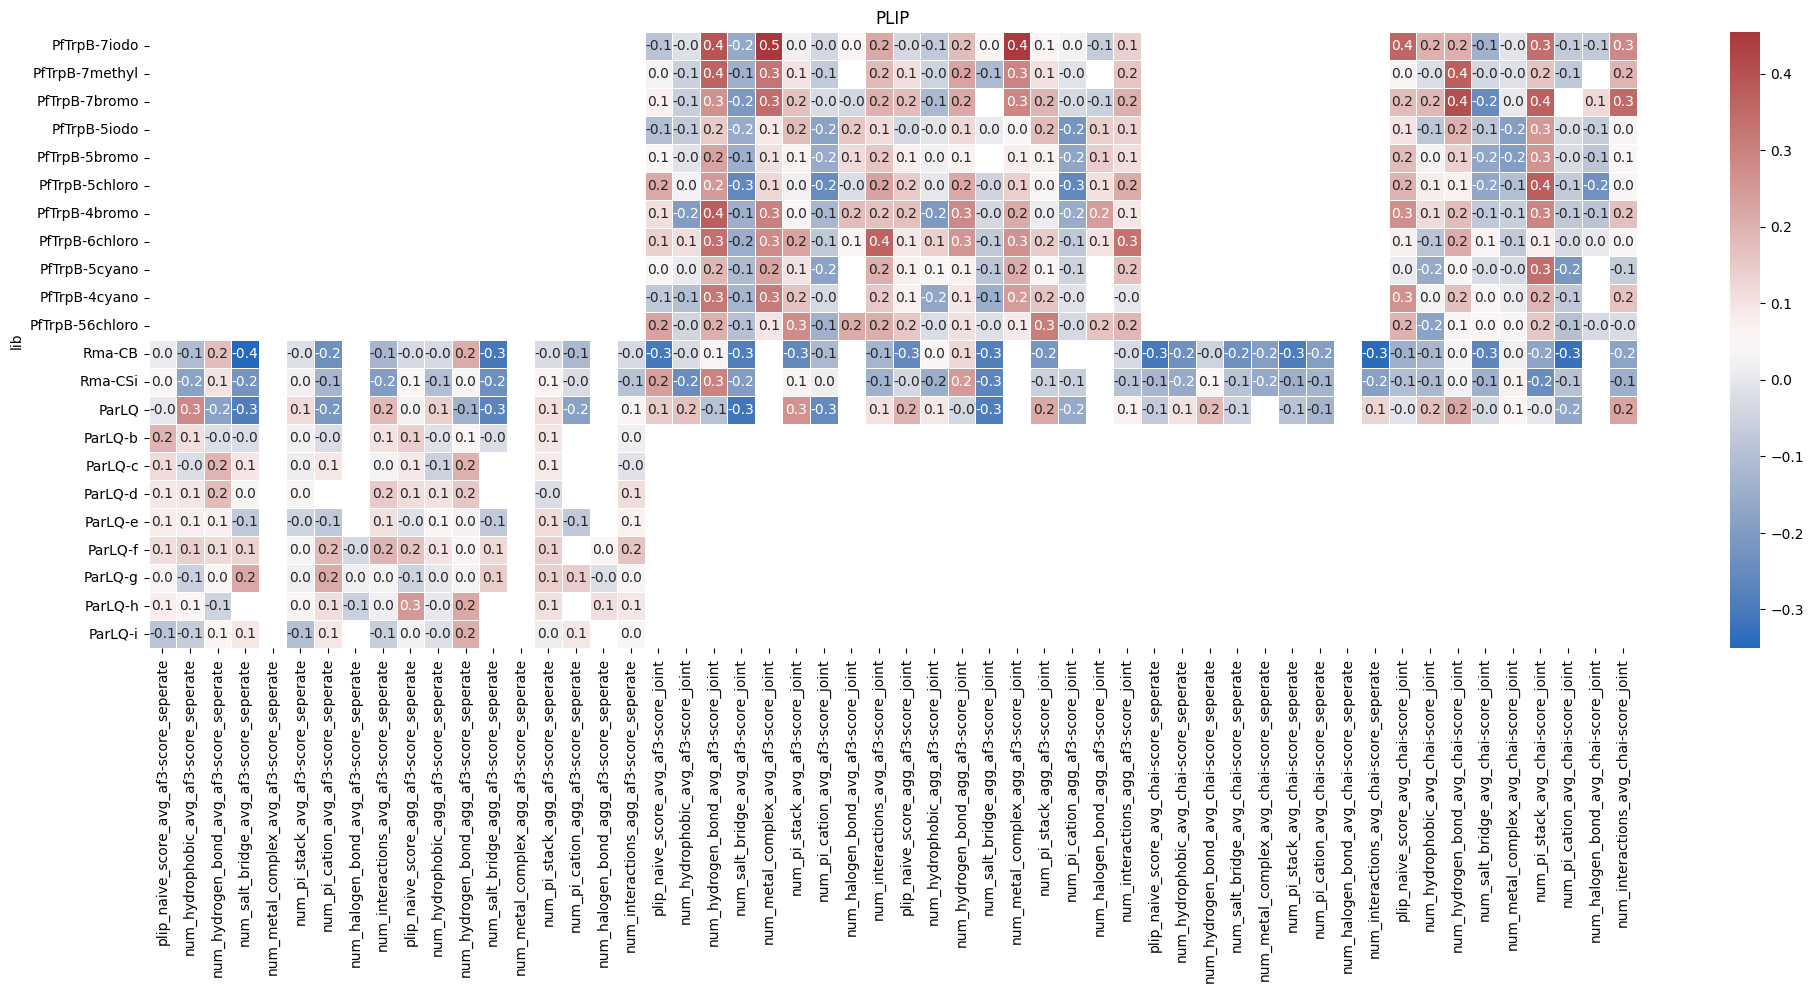

In [18]:
plip_metrics = [
    "lib",
    "plip_naive_score_avg_af3-score_seperate",
    "num_hydrophobic_avg_af3-score_seperate",
    # "sum_hydrophobic_avg_af3-score_seperate",
    "num_hydrogen_bond_avg_af3-score_seperate",
    # "sum_hydrogen_bond_avg_af3-score_seperate",
    "num_salt_bridge_avg_af3-score_seperate",
    # "sum_salt_bridge_avg_af3-score_seperate",
    "num_metal_complex_avg_af3-score_seperate",
    # "sum_metal_complex_avg_af3-score_seperate",
    "num_pi_stack_avg_af3-score_seperate",
    # "sum_pi_stack_avg_af3-score_seperate",
    "num_pi_cation_avg_af3-score_seperate",
    # "sum_pi_cation_avg_af3-score_seperate",
    "num_halogen_bond_avg_af3-score_seperate",
    # "sum_halogen_bond_avg_af3-score_seperate",
    "num_interactions_avg_af3-score_seperate",
    "plip_naive_score_agg_af3-score_seperate",
    "num_hydrophobic_agg_af3-score_seperate",
    # "sum_hydrophobic_agg_af3-score_seperate",
    "num_hydrogen_bond_agg_af3-score_seperate",
    # "sum_hydrogen_bond_agg_af3-score_seperate",
    "num_salt_bridge_agg_af3-score_seperate",
    # "sum_salt_bridge_agg_af3-score_seperate",
    "num_metal_complex_agg_af3-score_seperate",
    # "sum_metal_complex_agg_af3-score_seperate",
    "num_pi_stack_agg_af3-score_seperate",
    # "sum_pi_stack_agg_af3-score_seperate",
    "num_pi_cation_agg_af3-score_seperate",
    # "sum_pi_cation_agg_af3-score_seperate",
    "num_halogen_bond_agg_af3-score_seperate",
    # "sum_halogen_bond_agg_af3-score_seperate",
    "num_interactions_agg_af3-score_seperate",
    "plip_naive_score_avg_af3-score_joint",
    "num_hydrophobic_avg_af3-score_joint",
    # "sum_hydrophobic_avg_af3-score_joint",
    "num_hydrogen_bond_avg_af3-score_joint",
    # "sum_hydrogen_bond_avg_af3-score_joint",
    "num_salt_bridge_avg_af3-score_joint",
    # "sum_salt_bridge_avg_af3-score_joint",
    "num_metal_complex_avg_af3-score_joint",
    # "sum_metal_complex_avg_af3-score_joint",
    "num_pi_stack_avg_af3-score_joint",
    # "sum_pi_stack_avg_af3-score_joint",
    "num_pi_cation_avg_af3-score_joint",
    # "sum_pi_cation_avg_af3-score_joint",
    "num_halogen_bond_avg_af3-score_joint",
    # "sum_halogen_bond_avg_af3-score_joint",
    "num_interactions_avg_af3-score_joint",
    "plip_naive_score_agg_af3-score_joint",
    "num_hydrophobic_agg_af3-score_joint",
    # "sum_hydrophobic_agg_af3-score_joint",
    "num_hydrogen_bond_agg_af3-score_joint",
    # "sum_hydrogen_bond_agg_af3-score_joint",
    "num_salt_bridge_agg_af3-score_joint",
    # "sum_salt_bridge_agg_af3-score_joint",
    "num_metal_complex_agg_af3-score_joint",
    # "sum_metal_complex_agg_af3-score_joint",
    "num_pi_stack_agg_af3-score_joint",
    # "sum_pi_stack_agg_af3-score_joint",
    "num_pi_cation_agg_af3-score_joint",
    # "sum_pi_cation_agg_af3-score_joint",
    "num_halogen_bond_agg_af3-score_joint",
    # "sum_halogen_bond_agg_af3-score_joint",
    "num_interactions_agg_af3-score_joint",
    "plip_naive_score_avg_chai-score_seperate",
    "num_hydrophobic_avg_chai-score_seperate",
    # "sum_hydrophobic_avg_chai-score_seperate",
    "num_hydrogen_bond_avg_chai-score_seperate",
    # "sum_hydrogen_bond_avg_chai-score_seperate",
    "num_salt_bridge_avg_chai-score_seperate",
    # "sum_salt_bridge_avg_chai-score_seperate",
    "num_metal_complex_avg_chai-score_seperate",
    # "sum_metal_complex_avg_chai-score_seperate",
    "num_pi_stack_avg_chai-score_seperate",
    # "sum_pi_stack_avg_chai-score_seperate",
    "num_pi_cation_avg_chai-score_seperate",
    # "sum_pi_cation_avg_chai-score_seperate",
    "num_halogen_bond_avg_chai-score_seperate",
    # "sum_halogen_bond_avg_chai-score_seperate",
    "num_interactions_avg_chai-score_seperate",
    "plip_naive_score_avg_chai-score_joint",
    "num_hydrophobic_avg_chai-score_joint",
    # "sum_hydrophobic_avg_chai-score_joint",
    "num_hydrogen_bond_avg_chai-score_joint",
    # "sum_hydrogen_bond_avg_chai-score_joint",
    "num_salt_bridge_avg_chai-score_joint",
    # "sum_salt_bridge_avg_chai-score_joint",
    "num_metal_complex_avg_chai-score_joint",
    # "sum_metal_complex_avg_chai-score_joint",
    "num_pi_stack_avg_chai-score_joint",
    # "sum_pi_stack_avg_chai-score_joint",
    "num_pi_cation_avg_chai-score_joint",
    # "sum_pi_cation_avg_chai-score_joint",
    "num_halogen_bond_avg_chai-score_joint",
    # "sum_halogen_bond_avg_chai-score_joint",
    "num_interactions_avg_chai-score_joint"
]

plip_df = df_rho_fit[plip_metrics].set_index("lib").reindex(custom_order)

# Set the figure size
plt.figure(figsize=(24, 8))

# Create a heatmap
sns.heatmap(plip_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)

# Show the plot
plt.title("PLIP")
plt.show()

In [19]:
plip_df.mean().sort_values(ascending=False)[:16]

num_metal_complex_avg_af3-score_joint       0.242016
num_hydrogen_bond_avg_af3-score_joint       0.238973
num_metal_complex_agg_af3-score_joint       0.210913
num_pi_stack_avg_chai-score_joint           0.171691
num_hydrogen_bond_avg_chai-score_joint      0.167127
num_hydrogen_bond_agg_af3-score_joint       0.156176
num_interactions_avg_af3-score_joint        0.146445
num_interactions_agg_af3-score_joint        0.120545
plip_naive_score_avg_chai-score_joint       0.115248
num_pi_stack_avg_af3-score_joint            0.103638
num_halogen_bond_agg_af3-score_joint        0.097520
num_hydrogen_bond_agg_af3-score_seperate    0.093983
num_pi_stack_agg_af3-score_joint            0.090524
num_halogen_bond_avg_af3-score_joint        0.089009
num_interactions_avg_chai-score_joint       0.083275
num_pi_stack_agg_af3-score_seperate         0.073824
dtype: float64

In [20]:
[c for c in parlqb.columns if "vina" in c]

['vina_af3-score_seperate-substrate_cofactor-score_only',
 'vina_min_af3-score_seperate-substrate_cofactor-score_only',
 'vina_max_af3-score_seperate-substrate_cofactor-score_only',
 'vina_apo-score-substrate_cofactor-docked',
 'vina_min_apo-score-substrate_cofactor-docked',
 'vina_max_apo-score-substrate_cofactor-docked',
 'vina_chai-score_seperate-substrate_cofactor-score_only',
 'vina_min_chai-score_seperate-substrate_cofactor-score_only',
 'vina_max_chai-score_seperate-substrate_cofactor-score_only']

Text(0.5, 1.0, 'Vina')

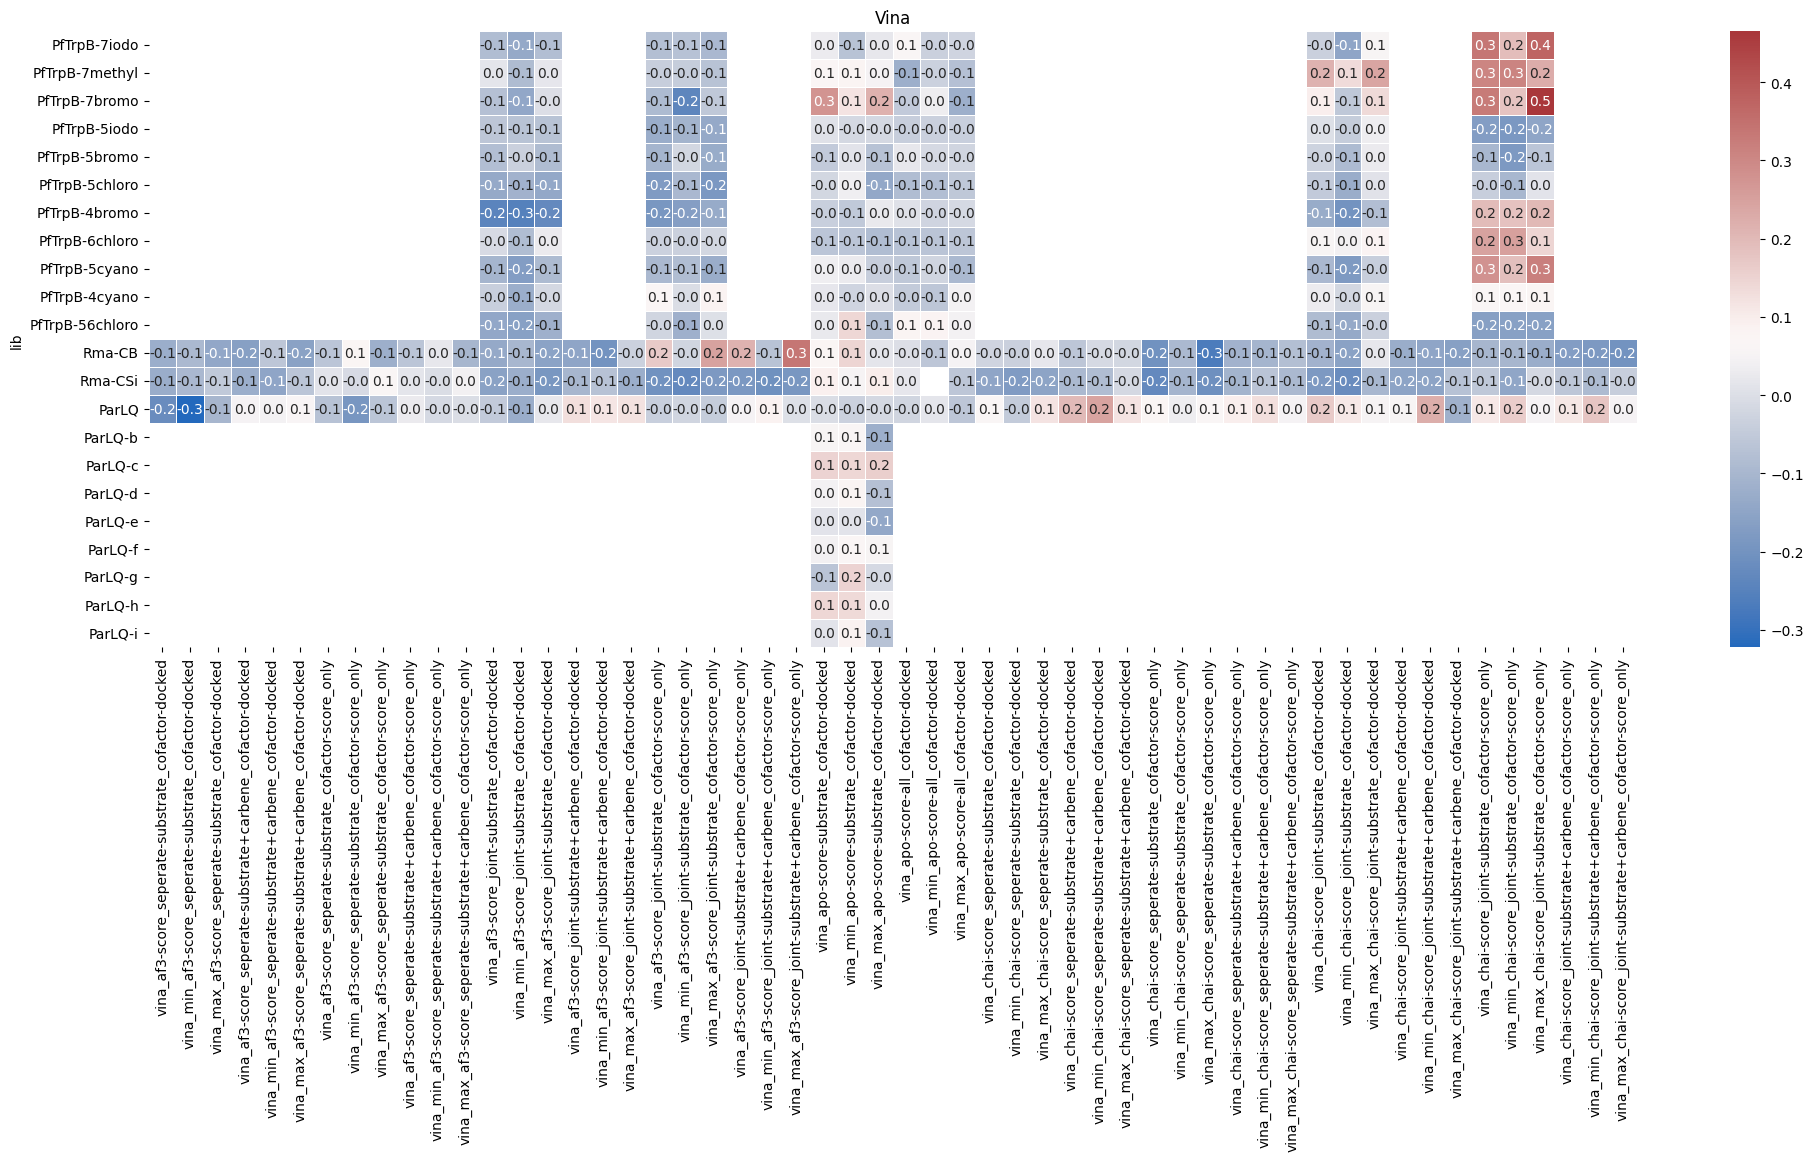

In [21]:
vina_cols = [
    "lib",
    "vina_af3-score_seperate-substrate_cofactor-docked",
    "vina_min_af3-score_seperate-substrate_cofactor-docked",
    "vina_max_af3-score_seperate-substrate_cofactor-docked",
    "vina_af3-score_seperate-substrate+carbene_cofactor-docked",
    "vina_min_af3-score_seperate-substrate+carbene_cofactor-docked",
    "vina_max_af3-score_seperate-substrate+carbene_cofactor-docked",
    "vina_af3-score_seperate-substrate_cofactor-score_only",
    "vina_min_af3-score_seperate-substrate_cofactor-score_only",
    "vina_max_af3-score_seperate-substrate_cofactor-score_only",
    "vina_af3-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_min_af3-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_max_af3-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_af3-score_joint-substrate_cofactor-docked",
    "vina_min_af3-score_joint-substrate_cofactor-docked",
    "vina_max_af3-score_joint-substrate_cofactor-docked",
    "vina_af3-score_joint-substrate+carbene_cofactor-docked",
    "vina_min_af3-score_joint-substrate+carbene_cofactor-docked",
    "vina_max_af3-score_joint-substrate+carbene_cofactor-docked",
    "vina_af3-score_joint-substrate_cofactor-score_only",
    "vina_min_af3-score_joint-substrate_cofactor-score_only",
    "vina_max_af3-score_joint-substrate_cofactor-score_only",
    "vina_af3-score_joint-substrate+carbene_cofactor-score_only",
    "vina_min_af3-score_joint-substrate+carbene_cofactor-score_only",
    "vina_max_af3-score_joint-substrate+carbene_cofactor-score_only",
    "vina_apo-score-substrate_cofactor-docked",
    "vina_min_apo-score-substrate_cofactor-docked",
    "vina_max_apo-score-substrate_cofactor-docked",
    "vina_apo-score-all_cofactor-docked",
    "vina_min_apo-score-all_cofactor-docked",
    "vina_max_apo-score-all_cofactor-docked",
    "vina_chai-score_seperate-substrate_cofactor-docked",
    "vina_min_chai-score_seperate-substrate_cofactor-docked",
    "vina_max_chai-score_seperate-substrate_cofactor-docked",
    "vina_chai-score_seperate-substrate+carbene_cofactor-docked",
    "vina_min_chai-score_seperate-substrate+carbene_cofactor-docked",
    "vina_max_chai-score_seperate-substrate+carbene_cofactor-docked",
    "vina_chai-score_seperate-substrate_cofactor-score_only",
    "vina_min_chai-score_seperate-substrate_cofactor-score_only",
    "vina_max_chai-score_seperate-substrate_cofactor-score_only",
    "vina_chai-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_min_chai-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_max_chai-score_seperate-substrate+carbene_cofactor-score_only",
    "vina_chai-score_joint-substrate_cofactor-docked",
    "vina_min_chai-score_joint-substrate_cofactor-docked",
    "vina_max_chai-score_joint-substrate_cofactor-docked",
    "vina_chai-score_joint-substrate+carbene_cofactor-docked",
    "vina_min_chai-score_joint-substrate+carbene_cofactor-docked",
    "vina_max_chai-score_joint-substrate+carbene_cofactor-docked",
    "vina_chai-score_joint-substrate_cofactor-score_only",
    "vina_min_chai-score_joint-substrate_cofactor-score_only",
    "vina_max_chai-score_joint-substrate_cofactor-score_only",
    "vina_chai-score_joint-substrate+carbene_cofactor-score_only",
    "vina_min_chai-score_joint-substrate+carbene_cofactor-score_only",
    "vina_max_chai-score_joint-substrate+carbene_cofactor-score_only"
]
vina_df = df_rho_fit[vina_cols].set_index("lib").reindex(custom_order)

# Set the figure size
plt.figure(figsize=(24, 8))
# Create a heatmap
sns.heatmap(vina_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)
# Show the plot
plt.title("Vina")

In [22]:
vina_df.mean().sort_values(ascending=False)[:16]

vina_max_chai-score_joint-substrate_cofactor-score_only              0.096372
vina_chai-score_joint-substrate_cofactor-score_only                  0.088187
vina_max_af3-score_joint-substrate+carbene_cofactor-score_only       0.050933
vina_min_apo-score-substrate_cofactor-docked                         0.049637
vina_min_chai-score_seperate-substrate+carbene_cofactor-docked       0.049318
vina_min_chai-score_joint-substrate_cofactor-score_only              0.046765
vina_apo-score-substrate_cofactor-docked                             0.037751
vina_max_chai-score_joint-substrate_cofactor-docked                  0.032554
vina_max_chai-score_seperate-substrate+carbene_cofactor-docked       0.027470
vina_af3-score_joint-substrate+carbene_cofactor-score_only           0.025905
vina_chai-score_seperate-substrate+carbene_cofactor-docked           0.014973
vina_min_af3-score_seperate-substrate+carbene_cofactor-score_only    0.001151
vina_max_chai-score_seperate-substrate_cofactor-docked          

Text(0.5, 1.0, 'Hydro')

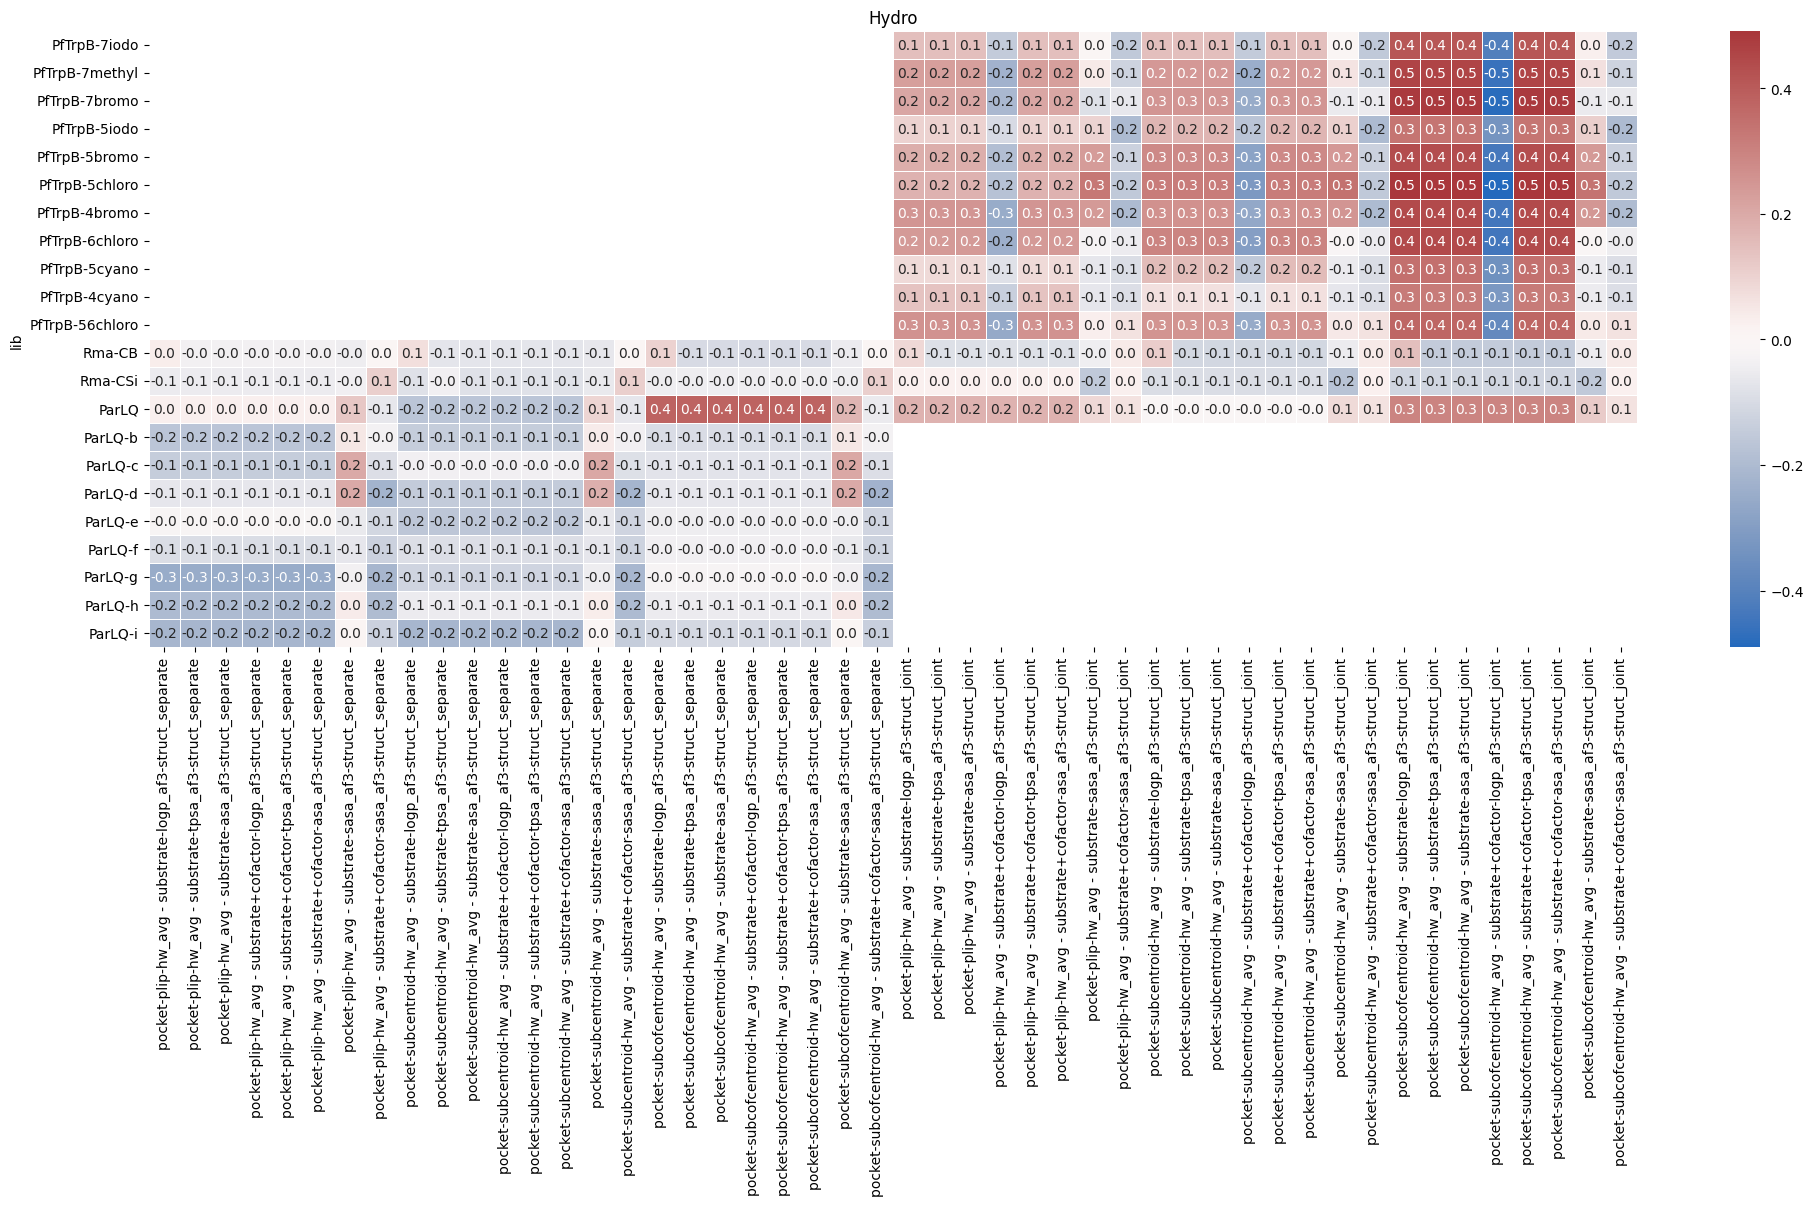

In [23]:
hydro_cols = [c for c in df_rho_fit.columns if " - " in c and "_avg" in c and "-hw" in c]
hydro_df = df_rho_fit[["lib"] + hydro_cols].set_index("lib").reindex(custom_order)

# Set the figure size
plt.figure(figsize=(24, 8))
# Create a heatmap
sns.heatmap(hydro_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)
# Show the plot
plt.title("Hydro")

In [24]:
hydro_df.mean().sort_values(ascending=False)[:20]

pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint             0.347928
pocket-subcofcentroid-hw_avg - substrate+cofactor-asa_af3-struct_joint     0.326645
pocket-subcofcentroid-hw_avg - substrate+cofactor-tpsa_af3-struct_joint    0.326645
pocket-subcofcentroid-hw_avg - substrate-asa_af3-struct_joint              0.326645
pocket-subcofcentroid-hw_avg - substrate-tpsa_af3-struct_joint             0.326645
pocket-subcentroid-hw_avg - substrate-logp_af3-struct_joint                0.175470
pocket-plip-hw_avg - substrate-logp_af3-struct_joint                       0.165057
pocket-subcentroid-hw_avg - substrate+cofactor-asa_af3-struct_joint        0.159489
pocket-subcentroid-hw_avg - substrate-asa_af3-struct_joint                 0.159489
pocket-subcentroid-hw_avg - substrate+cofactor-tpsa_af3-struct_joint       0.159489
pocket-subcentroid-hw_avg - substrate-tpsa_af3-struct_joint                0.159466
pocket-plip-hw_avg - substrate+cofactor-tpsa_af3-struct_joint              0

Text(0.5, 1.0, 'GALigandDock')

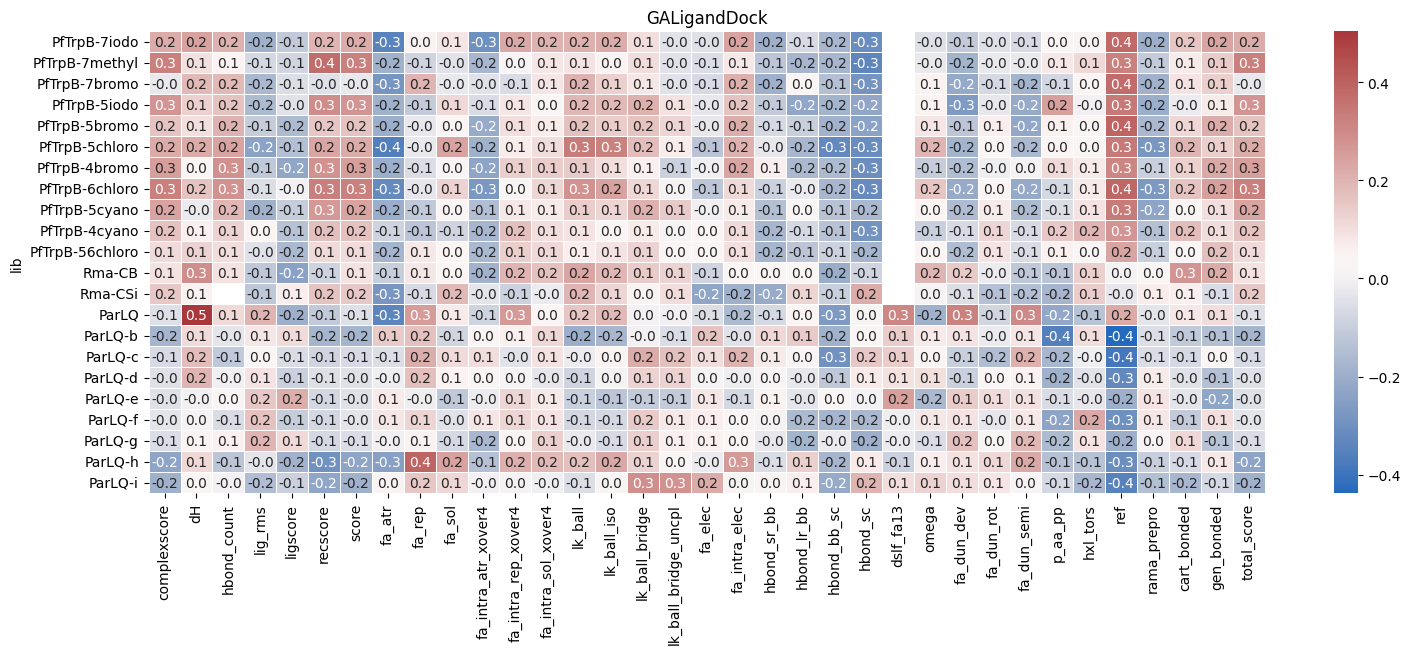

In [25]:
rosetta_cols = [
    "complexscore", "dH", "hbond_count", "lig_rms", "ligscore", 
     "recscore", "score", "fa_atr", "fa_rep", "fa_sol", 
    "fa_intra_atr_xover4", "fa_intra_rep_xover4", "fa_intra_sol_xover4", "lk_ball", 
    "lk_ball_iso", "lk_ball_bridge", "lk_ball_bridge_uncpl", "fa_elec", "fa_intra_elec", 
    "hbond_sr_bb", "hbond_lr_bb", "hbond_bb_sc", "hbond_sc", "dslf_fa13", "omega", 
    "fa_dun_dev", "fa_dun_rot", "fa_dun_semi", "p_aa_pp", "hxl_tors", "ref", 
    "rama_prepro", "cart_bonded", "gen_bonded", "total_score"
]

rosetta_df = df_rho_fit[["lib"] + rosetta_cols].set_index("lib").reindex(custom_order)

# Set the figure size
plt.figure(figsize=(18, 6))
# Create a heatmap
sns.heatmap(rosetta_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)
# Show the plot
plt.title("GALigandDock")

In [26]:
rosetta_df.mean().sort_values(ascending=False)[:10]

dH                     0.131117
lk_ball_bridge         0.116586
dslf_fa13              0.101063
lk_ball                0.097296
hbond_count            0.094904
lk_ball_iso            0.090420
fa_intra_sol_xover4    0.090052
fa_intra_rep_xover4    0.085654
fa_intra_elec          0.083748
complexscore           0.073509
dtype: float64

Text(0.5, 1.0, 'Vol')

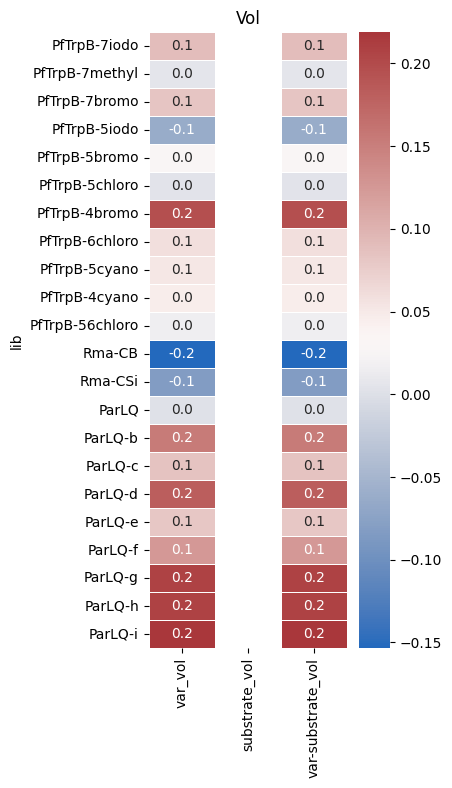

In [27]:
vol_cols = [c for c in df_rho_fit.columns if "_vol" in c]

vol_df = df_rho_fit[["lib"] + vol_cols].set_index("lib").reindex(custom_order)

# Set the figure size
plt.figure(figsize=(3.2, 8))
# Create a heatmap
sns.heatmap(vol_df, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)
# Show the plot
plt.title("Vol")

In [28]:
custom_order[-9:]

['ParLQ-a',
 'ParLQ-b',
 'ParLQ-c',
 'ParLQ-d',
 'ParLQ-e',
 'ParLQ-f',
 'ParLQ-g',
 'ParLQ-h',
 'ParLQ-i']

In [12]:
common_cols = [
    "lib",
    "hd",
    "ev_score",
    "esm_score",
    "esmif_score_apo-score",
    "coves_score_apo_clean-output-100_processed",
    "Triad_score_score-frompdb-cleanup",
    "ligandmpnn_score",
    "flowsite_score",
    "dH", # "complexscore",
    "vina_apo-score-substrate_cofactor-docked",
    "var_vol",
]
common_heme_col = common_cols + [
    "chain_iptm_BA_avg_score_seperate_chai",
    "chain_pae_min_CA_avg_score_seperate_af3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate",
    "num_hydrogen_bond_avg_af3-score_seperate",
    # "num_interactions_avg_af3-score_seperate"
]


common_col_dict = {
    "lib": "Library",
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM2",
    "esmif_score_apo-score": "ESM-IF",
    "coves_score_apo_clean-output-100_processed": "CoVES",
    "Triad_score_score-frompdb-cleanup": r"ΔΔ$G_f$",
    "ligandmpnn_score": "LigandMPNN",
    "flowsite_score": "FlowSite",
    "dH": "GALigandDock",
    # "complexscore": "GALigandock",
    "vina_apo-score-substrate_cofactor-docked": "Vina",
    "var_vol": "Active-site volume",
}
common_heme_col_dict = {
    **common_col_dict,
    "chain_iptm_BA_avg_score_seperate_chai": "Chai-1",
    "chain_pae_min_CA_avg_score_seperate_af3": "AF3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_seperate": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_seperate": "PLIP",
}

In [13]:
trpb_cols = common_cols + [
    "chain_iptm_AB_avg_score_joint_chai",
    "chain_pae_min_BA_avg_score_joint_af3",
    "2:GLU-NH_2_avg_af3-struct_joint",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint",
    "num_hydrogen_bond_avg_af3-score_joint",
    # "num_interactions_avg_af3-score_joint"
]

trpb_col_dict = {
    **common_col_dict,
    "chain_iptm_AB_avg_score_joint_chai": "Chai-1",
    "chain_pae_min_BA_avg_score_joint_af3": "AF3",
    "2:GLU-NH_2_avg_af3-struct_joint": "Bond distance",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_joint": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_joint": "PLIP",
}

parlq_cols = common_heme_col + ["0:C-C_1_avg_af3-struct_seperate"]

parlq_col_dict = {
    **common_heme_col_dict,
    "0:C-C_1_avg_af3-struct_seperate": "Bond distance",
}

cb_col = common_heme_col + ["0:C-B_avg_af3-struct_seperate"]

cb_col_dict = {**common_heme_col_dict, "0:C-B_avg_af3-struct_seperate": "Bond distance"}

csi_col = common_heme_col + ["0:C-Si_avg_af3-struct_seperate"]
csi_col_dict = {
    **common_heme_col_dict,
    "0:C-Si_avg_af3-struct_seperate": "Bond distance",
}

final_col_order = [
            "Library",
            "Hamming distance",
            "EVmutation",
            "ESM2",
            "ESM-IF",
            "CoVES",
            r"ΔΔ$G_f$", # "ΔΔG",
            "Vina",
            "GALigandDock",
            "AF3",
            "Chai-1",
            "LigandMPNN",
            "FlowSite",
            "Bond distance",
            "Hydrogen bonds",
            "Hydrophobicity",
            "Active-site volume",
        ]

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


def process_data(df, custom_order, group_name, col_dict, cols):
    """
    Filters, renames, and processes a subset of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - custom_order (list): List of libraries to filter.
    - group_name (str): Name of the new average group (e.g., "PfTrpB-avg").
    - col_dict (dict): Mapping of column names for renaming.
    - cols (list): List of relevant columns to keep.

    Returns:
    - processed_df (pd.DataFrame): The processed DataFrame.
    - group_avg_df (pd.DataFrame): A DataFrame containing the average values for the group.
    """
    processed_df = df[df["lib"].isin(custom_order)].copy()
    processed_df = processed_df[cols].rename(columns=col_dict).reset_index(drop=True)

    # Compute mean values
    group_avg_df = processed_df.set_index("Library").mean().to_frame().T
    group_avg_df["Library"] = group_name
    group_avg_df = group_avg_df[
        ["Library"] + group_avg_df.columns.tolist()[:-1]
    ].reset_index(drop=True)

    return processed_df, group_avg_df


def plot_heatmap(
    data,
    title,
    output_path,
    custom_order,
    colorbar_label,
    figsize=(8, 1.6),
    cbar_shrink=1.0,
):
    """
    Creates and saves a heatmap based on the processed data.

    Parameters:
    - data (pd.DataFrame): Data to plot.
    - title (str): Title of the heatmap.
    - output_path (str): Path to save the figure.
    - custom_order (list): Order for reindexing.
    - colorbar_label (str): Label for the colorbar.
    - figsize (tuple): Figure size.
    - cbar_shrink (float): Shrink factor for the colorbar.
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        data.set_index("Library").reindex(custom_order),
        cmap="vlag",
        annot=True,
        fmt=".1f",
        linewidths=0.5,
        cbar_kws={"label": colorbar_label, "shrink": cbar_shrink},
        vmin=-0.25,
        vmax=0.55,
    )
    plt.savefig(output_path, format="svg", dpi=300, bbox_inches="tight")
    print(f"Saved heatmap: {output_path}")


def process_and_plot(
    df,
    custom_order,
    trpb_cols,
    parlq_cols,
    cb_col,
    csi_col,
    trpb_col_dict,
    parlq_col_dict,
    cb_col_dict,
    csi_col_dict,
    final_col_order,
    metric_name,
    colorbar_label,
    output_dir,
):
    """
    Processes data and generates heatmaps for a given metric.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - custom_order (list): Custom sorting order.
    - trpb_cols, parlq_cols, cb_col, csi_col (list): Relevant columns for each group.
    - trpb_col_dict, parlq_col_dict, cb_col_dict, csi_col_dict (dict): Column renaming mappings.
    - final_col_order (list): Final order of columns for the heatmap.
    - metric_name (str): Metric name (e.g., "fit_rho").
    - colorbar_label (str): Label for the colorbar.
    - output_dir (str): Directory to save outputs.
    """

    # Process each group
    trpb_rho_df, trpbmean = process_data(
        df, custom_order[:11], "PfTrpB-avg", trpb_col_dict, trpb_cols
    )
    parlq_rho_df, parlqmean = process_data(
        df, custom_order[-9:], "ParLQ-avg", parlq_col_dict, parlq_cols
    )

    cb_df = (
        df[df["lib"] == "Rma-CB"]
        .copy()[cb_col]
        .rename(columns=cb_col_dict)
        .reset_index(drop=True)
    )
    csi_df = (
        df[df["lib"] == "Rma-CSi"]
        .copy()[csi_col]
        .rename(columns=csi_col_dict)
        .reset_index(drop=True)
    )

    # Small summary heatmap
    summary_data = pd.concat([trpbmean, cb_df, csi_df, parlqmean])[final_col_order]
    plot_heatmap(
        summary_data,
        f"ZS Summary: {metric_name}",
        os.path.join(output_dir, f"zs_sum_{metric_name}.svg"),
        ["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"],
        colorbar_label,
        figsize=(8, 1.6),
    )

    # Full heatmap for all entries
    full_data = pd.concat([trpb_rho_df, cb_df, csi_df, parlq_rho_df])[final_col_order]
    plot_heatmap(
        full_data,
        f"ZS Summary: {metric_name} (All)",
        os.path.join(output_dir, f"zs_sum_{metric_name}_all.svg"),
        custom_order,
        colorbar_label,
        figsize=(7.2, 8),
        cbar_shrink=0.5,
    )

In [14]:
trpb_rho_df = df_rho_fit[df_rho_fit["lib"].isin(custom_order[:11])].copy()
trpb_rho_df = (
    trpb_rho_df[trpb_cols].rename(columns=trpb_col_dict).copy().reset_index(drop=True)
)

# rename the lib to be PfTrpB
trpbmean = trpb_rho_df.set_index("Library").mean().to_frame().T
trpbmean["Library"] = "PfTrpB-avg"
trpbmean = trpbmean[["Library"] + trpbmean.columns.tolist()[:-1]].reset_index(drop=True)

parlq_rho_df = df_rho_fit[
    df_rho_fit["lib"].isin(custom_order[-9:])
].copy()  # df_rho_fit[df_rho_fit["lib"] == "ParLQ"].copy()
parlq_rho_df = (
    parlq_rho_df[parlq_cols]
    .rename(columns=parlq_col_dict)
    .copy()
    .reset_index(drop=True)
)

parlqmean = parlq_rho_df.set_index("Library").mean().to_frame().T
parlqmean["Library"] = "ParLQ-avg"
parlqmean = parlqmean[["Library"] + parlqmean.columns.tolist()[:-1]].reset_index(
    drop=True
)

cb_df = df_rho_fit[df_rho_fit["lib"] == "Rma-CB"].copy()
cb_df = cb_df[cb_col].rename(columns=cb_col_dict).copy().reset_index(drop=True)

csi_df = df_rho_fit[df_rho_fit["lib"] == "Rma-CSi"].copy()
csi_df = csi_df[csi_col].rename(columns=csi_col_dict).copy().reset_index(drop=True)

In [24]:
pd.concat([trpb_rho_df, cb_df, csi_df, parlq_rho_df])[final_col_order].iloc[:, 1:].mean().sort_values(ascending=False).to_dict()

{'EVmutation': 0.2768217811770033,
 'AF3': 0.27510937817719155,
 'ESM-IF': 0.25337639060174316,
 'ΔΔ$G_f$': 0.2379359431572363,
 'FlowSite': 0.21761692578910427,
 'LigandMPNN': 0.21048597028211027,
 'Hydrophobicity': 0.20279195117240587,
 'ESM2': 0.19043004987201814,
 'Hydrogen bonds': 0.16327797464481064,
 'CoVES': 0.1472555339875756,
 'Chai-1': 0.14200187107097997,
 'GALigandDock': 0.13934204077544654,
 'Hamming distance': 0.1056120088180185,
 'Active-site volume': 0.08280477916699046,
 'Bond distance': 0.06068436002481947,
 'Vina': 0.03607632647375907}

In [25]:
pd.concat([trpb_rho_df])[final_col_order].iloc[:, 1:].mean().sort_values(ascending=False).to_dict()

{'ΔΔ$G_f$': 0.5253289357437795,
 'ESM2': 0.5124583994951976,
 'ESM-IF': 0.4810307696386174,
 'LigandMPNN': 0.47801272827331504,
 'EVmutation': 0.46518079125650635,
 'Hydrophobicity': 0.4128233605118986,
 'CoVES': 0.40745455124729146,
 'FlowSite': 0.4007230776739647,
 'Hamming distance': 0.33779809958022083,
 'Hydrogen bonds': 0.2801681087347339,
 'AF3': 0.24164239866966852,
 'Chai-1': 0.20935941751292428,
 'Bond distance': 0.18531261006748512,
 'GALigandDock': 0.12278454354024532,
 'Active-site volume': 0.04690766076960489,
 'Vina': 0.02565526483564774}

In [26]:
pd.concat([cb_df, csi_df, parlq_rho_df])[final_col_order].iloc[:, 1:].mean().sort_values(ascending=False).to_dict()

{'AF3': 0.3085763576847145,
 'GALigandDock': 0.1558995380106477,
 'Active-site volume': 0.11870189756437602,
 'EVmutation': 0.08846277109750018,
 'Chai-1': 0.07464432462903574,
 'Vina': 0.04649738811187042,
 'Hydrogen bonds': 0.04638784055488743,
 'FlowSite': 0.03451077390424388,
 'ESM-IF': 0.025722011564868717,
 'Hydrophobicity': -0.007239458167086755,
 'ΔΔ$G_f$': -0.04945704942930689,
 'LigandMPNN': -0.05704078770909446,
 'Bond distance': -0.06394389001784614,
 'CoVES': -0.11294348327214027,
 'Hamming distance': -0.1265740819441838,
 'ESM2': -0.1315982997511613}

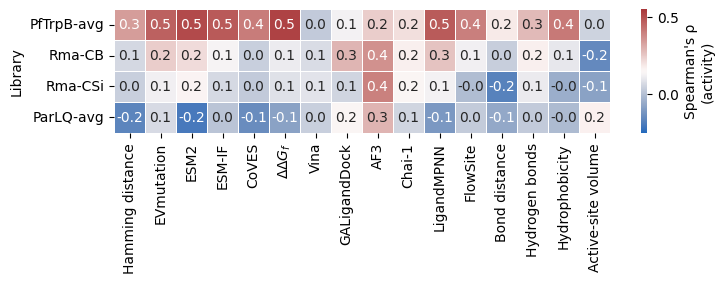

In [63]:

# Set the figure size
plt.figure(figsize=(8, 1.6))
# Create a heatmap
sns.heatmap(
    pd.concat([trpbmean, cb_df, csi_df, parlqmean])[final_col_order]
    .set_index("Library")
    .reindex(["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5]},
    vmin=-0.25,
    vmax=0.55
)
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
# plt.savefig("figs/zs_sum_fit_rho.svg", format="svg", dpi=300, bbox_inches="tight")

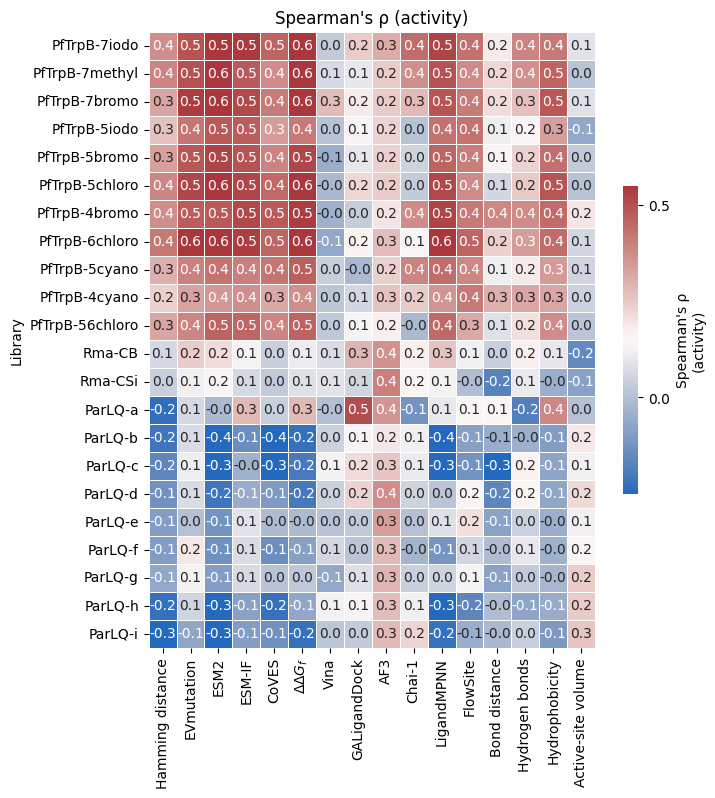

In [64]:
# Set the figure size
plt.figure(figsize=(7.2, 8))
# Create a heatmap
sns.heatmap(
    pd.concat([trpb_rho_df, cb_df, csi_df, parlq_rho_df])[final_col_order]
    .set_index("Library")
    .reindex(custom_order),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5], "shrink": 0.5}, # make it narrower 
    vmin=-0.25,
    vmax=0.55
)
# Show the plot
plt.title("Spearman's ρ (activity)")
plt.savefig("figs/zs_sum_fit_rho_all.svg", format="svg", dpi=300, bbox_inches="tight")

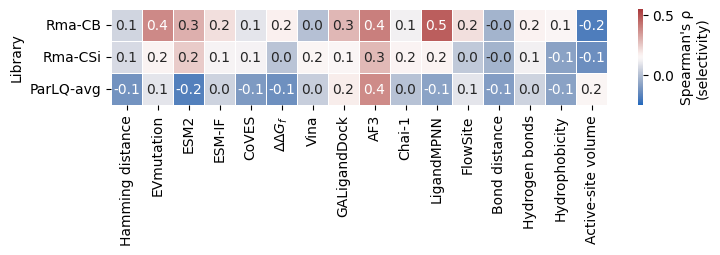

In [65]:
parlq_rho_df = df_rho_sele[df_rho_sele["lib"].isin(custom_order[-9:])].copy()# df_rho_fit[df_rho_fit["lib"] == "ParLQ"].copy()
parlq_rho_df = (
    parlq_rho_df[parlq_cols]
    .rename(
        columns=parlq_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

parlqmean = parlq_rho_df.set_index("Library").mean().to_frame().T
parlqmean["Library"] = "ParLQ-avg"
parlqmean = parlqmean[["Library"] + parlqmean.columns.tolist()[:-1]].reset_index(drop=True)

cb_df = df_rho_sele[df_rho_sele["lib"] == "Rma-CB"].copy()
cb_df = (
    cb_df[
        cb_col
    ]
    .rename(
        columns=cb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

csi_df = df_rho_sele[df_rho_sele["lib"] == "Rma-CSi"].copy()
csi_df = (
    csi_df[
        csi_col
    ]
    .rename(
        columns=csi_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# Set the figure size
plt.figure(figsize=(8, 1.24))
# Create a heatmap
sns.heatmap(
    pd.concat([cb_df, csi_df, parlqmean])[final_col_order]
    .set_index("Library")
    .reindex(["Rma-CB", "Rma-CSi", "ParLQ-avg"]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    vmin=-0.25,
    vmax=0.55,
    # set color bar min and max
    cbar_kws={"label": "Spearman's ρ\n(selectivity)"},
)
# Show the plot
# plt.title("ZS Summary: Spearman correlation for selectivity")
plt.savefig("figs/zs_sum_sele_rho.svg", format="svg", dpi=300, bbox_inches="tight")

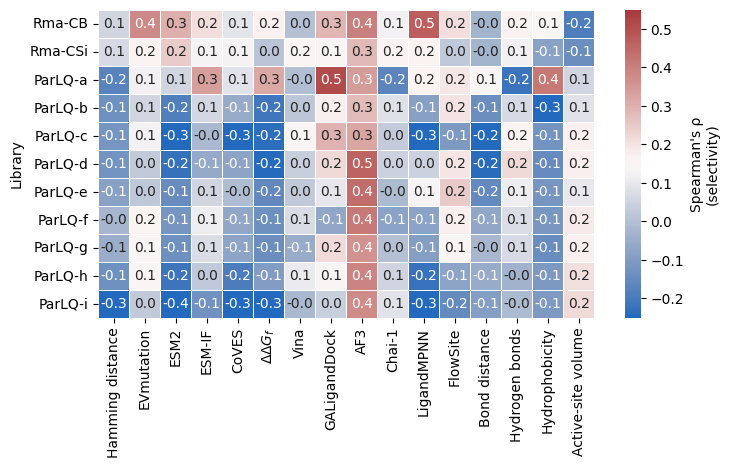

In [66]:

# Set the figure size
plt.figure(figsize=(8, 4))
# Create a heatmap
sns.heatmap(
    pd.concat([cb_df, csi_df, parlq_rho_df])[final_col_order]
    .set_index("Library")
    .reindex(custom_order[-11:]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    vmin=-0.25,
    vmax=0.55,
    # set color bar min and max
    cbar_kws={"label": "Spearman's ρ\n(selectivity)"},
)
# Show the plot
# plt.title("ZS Summary: Spearman correlation for selectivity")
plt.savefig("figs/zs_sum_sele_rho_all.svg", format="svg", dpi=300, bbox_inches="tight")

In [67]:
df_rho_fit[["lib", "selectivity"]]

lib  selectivity
0           ParLQ-b     0.716367
1           ParLQ-c     0.922010
2           ParLQ-d     0.923523
3           ParLQ-e     0.885885
4           ParLQ-f     0.801194
5           ParLQ-g     0.663896
6           ParLQ-h     0.914111
7           ParLQ-i     0.720592
8           ParLQ-a     0.961007
9     PfTrpB-4bromo          NaN
10    PfTrpB-4cyano          NaN
11  PfTrpB-56chloro          NaN
12    PfTrpB-5bromo          NaN
13   PfTrpB-5chloro          NaN
14    PfTrpB-5cyano          NaN
15     PfTrpB-5iodo          NaN
16   PfTrpB-6chloro          NaN
17    PfTrpB-7bromo          NaN
18     PfTrpB-7iodo          NaN
19   PfTrpB-7methyl          NaN
20           Rma-CB     0.643717
21          Rma-CSi     0.455375

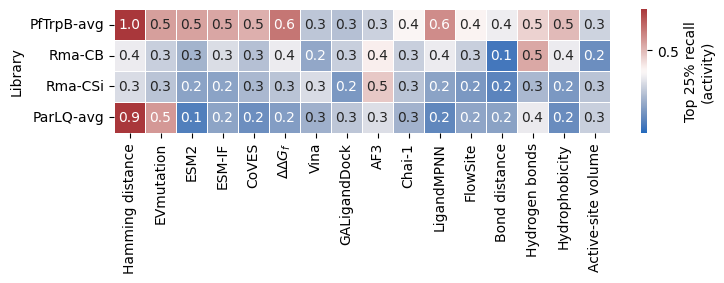

In [68]:
trpb_rho_df = df_top25_fit[df_top25_fit["lib"].isin(custom_order[:11])].copy()
trpb_rho_df = (
    trpb_rho_df[trpb_cols
    ]
    .rename(
        columns=trpb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# rename the lib to be PfTrpB
trpbmean = trpb_rho_df.set_index("Library").mean().to_frame().T
trpbmean["Library"] = "PfTrpB-avg"
trpbmean = trpbmean[["Library"] + trpbmean.columns.tolist()[:-1]].reset_index(drop=True)

parlq_rho_df = df_top25_fit[df_top25_fit["lib"].isin(custom_order[-9:])].copy()# df_rho_fit[df_rho_fit["lib"] == "ParLQ"].copy()
parlq_rho_df = (
    parlq_rho_df[
        parlq_cols
    ]
    .rename(
        columns=parlq_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

parlqmean = parlq_rho_df.set_index("Library").mean().to_frame().T
parlqmean["Library"] = "ParLQ-avg"
parlqmean = parlqmean[["Library"] + parlqmean.columns.tolist()[:-1]].reset_index(drop=True)

cb_df = df_top25_fit[df_top25_fit["lib"] == "Rma-CB"].copy()
cb_df = (
    cb_df[
        cb_col
    ]
    .rename(
        columns=cb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

csi_df = df_top25_fit[df_top25_fit["lib"] == "Rma-CSi"].copy()
csi_df = (
    csi_df[
        csi_col
    ]
    .rename(
        columns=csi_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# Set the figure size
plt.figure(figsize=(8, 1.6))
# Create a heatmap
sns.heatmap(
    pd.concat([trpbmean, cb_df, csi_df, parlqmean])[
        final_col_order
    ]
    .set_index("Library")
    .reindex(["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Top 25% recall\n(activity)", "ticks": [0, 0.5]},
    vmin=0.1,
    vmax=0.7
)
# Show the plot
# plt.title(r"ZS Summary: top 25% recall")
plt.savefig("figs/zs_sum_fit_recall25.svg", format="svg", dpi=300, bbox_inches="tight")

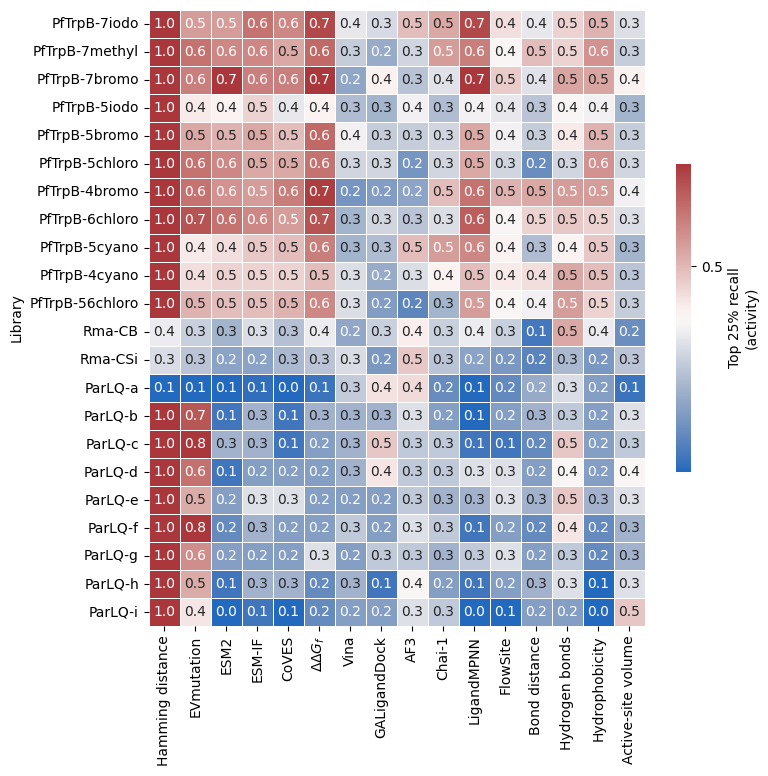

In [69]:
# Set the figure size
plt.figure(figsize=(8, 8))
# Create a heatmap
sns.heatmap(
    pd.concat([trpb_rho_df, cb_df, csi_df, parlq_rho_df])[
        final_col_order
    ]
    .set_index("Library")
    .reindex(custom_order),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Top 25% recall\n(activity)", "ticks": [0, 0.5], "shrink": 0.5}, # make it narrower
    vmin=0.1,
    vmax=0.7
)
# Show the plot
# plt.title(r"ZS Summary: top 25% recall")
plt.savefig("figs/zs_sum_fit_recall25_all.svg", format="svg", dpi=300, bbox_inches="tight")

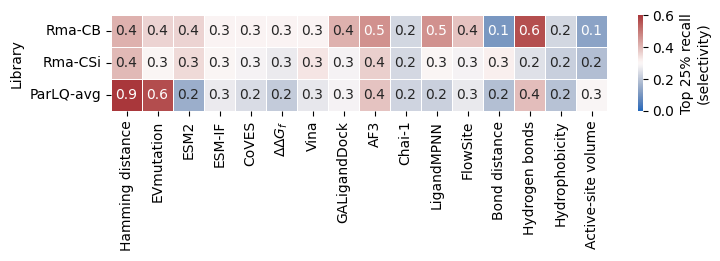

In [70]:
parlq_rho_df = df_top25_sele[df_top25_sele["lib"].isin(custom_order[-9:])].copy()# df_rho_fit[df_rho_fit["lib"] == "ParLQ"].copy()
parlq_rho_df = (
    parlq_rho_df[parlq_cols]
    .rename(
        columns=parlq_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

parlqmean = parlq_rho_df.set_index("Library").mean().to_frame().T
parlqmean["Library"] = "ParLQ-avg"
parlqmean = parlqmean[["Library"] + parlqmean.columns.tolist()[:-1]].reset_index(drop=True)

cb_df = df_top25_sele[df_top25_sele["lib"] == "Rma-CB"].copy()
cb_df = (
    cb_df[
        cb_col
    ]
    .rename(
        columns=cb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

csi_df = df_top25_sele[df_top25_sele["lib"] == "Rma-CSi"].copy()
csi_df = (
    csi_df[
        csi_col
    ]
    .rename(
        columns=csi_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# Set the figure size
plt.figure(figsize=(8, 1.24))
# Create a heatmap
sns.heatmap(
    pd.concat([cb_df, csi_df, parlqmean])[final_col_order]
    .set_index("Library")
    .reindex(["Rma-CB", "Rma-CSi", "ParLQ-avg"]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    vmin=0,
    vmax=0.6,
    # set color bar min and max
    cbar_kws={"label": "Top 25% recall\n(selectivity)"},
)
# Show the plot
# plt.title("ZS Summary: Spearman correlation for selectivity")
plt.savefig("figs/zs_sum_sele_recall25.svg", format="svg", dpi=300, bbox_inches="tight")

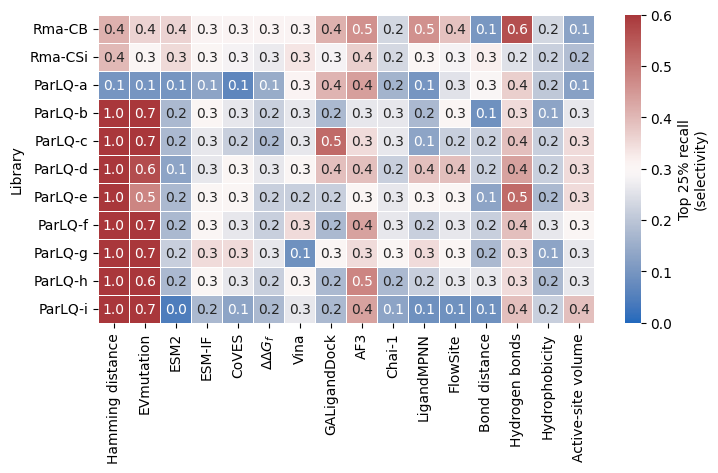

In [71]:

# Set the figure size
plt.figure(figsize=(8, 4))
# Create a heatmap
sns.heatmap(
    pd.concat([cb_df, csi_df, parlq_rho_df])[final_col_order]
    .set_index("Library")
    .reindex(custom_order[-11:]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    vmin=-0,
    vmax=0.6,
    # set color bar min and max
    cbar_kws={"label": "Top 25% recall\n(selectivity)"},
)
# Show the plot
# plt.title("ZS Summary: Spearman correlation for selectivity")
plt.savefig("figs/zs_sum_sele_recall25_all.svg", format="svg", dpi=300, bbox_inches="tight")

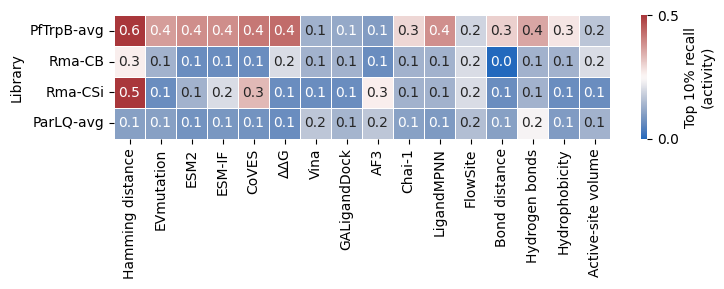

In [24]:
trpb_rho_df = df_top10_fit[df_top10_fit["lib"].isin(custom_order[:11])].copy()
trpb_rho_df = (
    trpb_rho_df[trpb_cols
    ]
    .rename(
        columns=trpb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# rename the lib to be PfTrpB
trpbmean = trpb_rho_df.set_index("Library").mean().to_frame().T
trpbmean["Library"] = "PfTrpB-avg"
trpbmean = trpbmean[["Library"] + trpbmean.columns.tolist()[:-1]].reset_index(drop=True)

parlq_rho_df = df_top10_fit[df_top10_fit["lib"].isin(custom_order[-9:])].copy()# df_rho_fit[df_rho_fit["lib"] == "ParLQ"].copy()
parlq_rho_df = (
    parlq_rho_df[
        parlq_cols
    ]
    .rename(
        columns=parlq_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

parlqmean = parlq_rho_df.set_index("Library").mean().to_frame().T
parlqmean["Library"] = "ParLQ-avg"
parlqmean = parlqmean[["Library"] + parlqmean.columns.tolist()[:-1]].reset_index(drop=True)

cb_df = df_top10_fit[df_top10_fit["lib"] == "Rma-CB"].copy()
cb_df = (
    cb_df[
        cb_col
    ]
    .rename(
        columns=cb_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

csi_df = df_top10_fit[df_top10_fit["lib"] == "Rma-CSi"].copy()
csi_df = (
    csi_df[
        csi_col
    ]
    .rename(
        columns=csi_col_dict
    )
    .copy()
    .reset_index(drop=True)
)

# Set the figure size
plt.figure(figsize=(8, 1.6))
# Create a heatmap
sns.heatmap(
    pd.concat([trpbmean, cb_df, csi_df, parlqmean])[
        final_col_order
    ]
    .set_index("Library")
    .reindex(["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Top 10% recall\n(activity)", "ticks": [0, 0.5]},
    vmin=0,
    vmax=0.5
)
# Show the plot
# plt.title(r"ZS Summary: top 25% recall")
plt.savefig("figs/zs_sum_fit_recall10.svg", format="svg", dpi=300, bbox_inches="tight")

In [20]:
df_rho_fit[df_rho_fit["lib"].isin(["PfTrpB_scope","Rma-CB_scope", "Rma-CSi_scope"])]

Empty DataFrame
Columns: [lib, selectivity, n_mut, hd, substrate, substrate-smiles, product, product-smiles, ev_score, esm_score, flowsite_score, flowsite_std, ligandmpnn_score, var_vol, substrate_vol, var-substrate_vol, Unnamed: 0, atom_type_match, complexscore, dH, hbond_count, lig_rms, ligscore, native_hbond_ratio, ranking_prerelax, recscore, score, fa_atr, fa_rep, fa_sol, fa_intra_atr_xover4, fa_intra_rep_xover4, fa_intra_sol_xover4, lk_ball, lk_ball_iso, lk_ball_bridge, lk_ball_bridge_uncpl, fa_elec, fa_intra_elec, hbond_sr_bb, hbond_lr_bb, hbond_bb_sc, hbond_sc, dslf_fa13, omega, fa_dun_dev, fa_dun_rot, fa_dun_semi, p_aa_pp, hxl_tors, ref, rama_prepro, cart_bonded, gen_bonded, total_score, esmif_score_apo-score, coves_score_apo_clean-output-100_processed, Triad_score_score-frompdb-cleanup, ranking_score_agg_score_seperate_af3, mean_site_score_agg_score_seperate_af3, ptm_agg_score_seperate_af3, iptm_agg_score_seperate_af3, fraction_disordered_agg_score_seperate_af3, chain_ptm_A_agg_score_seperate_af3, chain_iptm_A_agg_score_seperate_af3, chain_pae_min_AA_agg_score_seperate_af3, chain_pae_min_AB_agg_score_seperate_af3, chain_iptm_AB_agg_score_seperate_af3, chain_pae_min_AC_agg_score_seperate_af3, chain_iptm_AC_agg_score_seperate_af3, chain_ptm_B_agg_score_seperate_af3, chain_iptm_B_agg_score_seperate_af3, chain_pae_min_BA_agg_score_seperate_af3, chain_iptm_BA_agg_score_seperate_af3, chain_pae_min_BB_agg_score_seperate_af3, chain_pae_min_BC_agg_score_seperate_af3, chain_iptm_BC_agg_score_seperate_af3, chain_ptm_C_agg_score_seperate_af3, chain_iptm_C_agg_score_seperate_af3, chain_pae_min_CA_agg_score_seperate_af3, chain_iptm_CA_agg_score_seperate_af3, chain_pae_min_CB_agg_score_seperate_af3, chain_iptm_CB_agg_score_seperate_af3, chain_pae_min_CC_agg_score_seperate_af3, ranking_score_avg_score_seperate_af3, ranking_score_std_score_seperate_af3, ptm_avg_score_seperate_af3, ptm_std_score_seperate_af3, iptm_avg_score_seperate_af3, iptm_std_score_seperate_af3, fraction_disordered_avg_score_seperate_af3, fraction_disordered_std_score_seperate_af3, chain_ptm_A_avg_score_seperate_af3, chain_ptm_A_std_score_seperate_af3, chain_iptm_A_avg_score_seperate_af3, chain_iptm_A_std_score_seperate_af3, chain_iptm_AB_avg_score_seperate_af3, chain_iptm_AB_std_score_seperate_af3, chain_pae_min_AB_avg_score_seperate_af3, chain_pae_min_AB_std_score_seperate_af3, ...]
Index: []

[0 rows x 2716 columns]